# Laboratorio 2

Estudiante 1: Juan Diego Niebles Navas - 202221193 \
Estudiante 2: Esteban Benavides Velandia - 202220429 \
Estudiante 3: Miguel Santiago Castillo Hernandez- 201633992

*Ey buenas a todos, guapisimos aquí el grupo 13 en un gameplay de planeta BI. El día de hoy vamos a resolver un problema agrupación de café (ñum ñum)...*



# 1. Entendimiento de los datos (Juan Diego Niebles)

Antes de empezar, es importante tener claro el objetivo del laboratorio, el cual es buscar grupos de café que tengan aspectos en común como heterogeneidad en tamaño, forma y estructura pues esto puede afectar tanto los procesos de tostión como la percepción de calidad del consumidor final. Así, en esta sección se va a escribir las características más relevantes de los datos y todo el perfilamiento de datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado y poder cumplir de la mejor manera el objetivo.


In [1]:
# Instalación de paquetes necesarios (descomentar de ser necesario)

# !pip install numpy -q
# !pip install pandas -q
# !pip install matplotlib -q
# !pip install seaborn -q
# !pip install scikit-learn -q
# !pip install joblib -q

# imports

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


Inicialmente se va a realizar la carga de datos

In [2]:

# Cargar el dataset
df = pd.read_csv('Datos\Datos_SenecaféAlpes.csv', sep=',', encoding='utf-8')

# Visualizar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\diego\AppData\Local\Temp\ipykernel_26580\832399760.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('Datos\Datos_SenecaféAlpes.csv', sep=',', encoding='utf-8')


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Se puede considerar la eliminación de la columna ID ya que esta no aporta información sobre la forma de las semillas, es un identificador.

Ahora se va a revisar el tamaño del dataset para entender mejor con qué se está trabajando.

In [3]:
# Revisar dimensiones
print("Dimensiones del dataset (filas, columnas):", df.shape)

Dimensiones del dataset (filas, columnas): (14291, 19)


Se puede afirmar que hay 14291 filas que corresponden a 19 tipos de datos diferentes, que según el diccionario son:

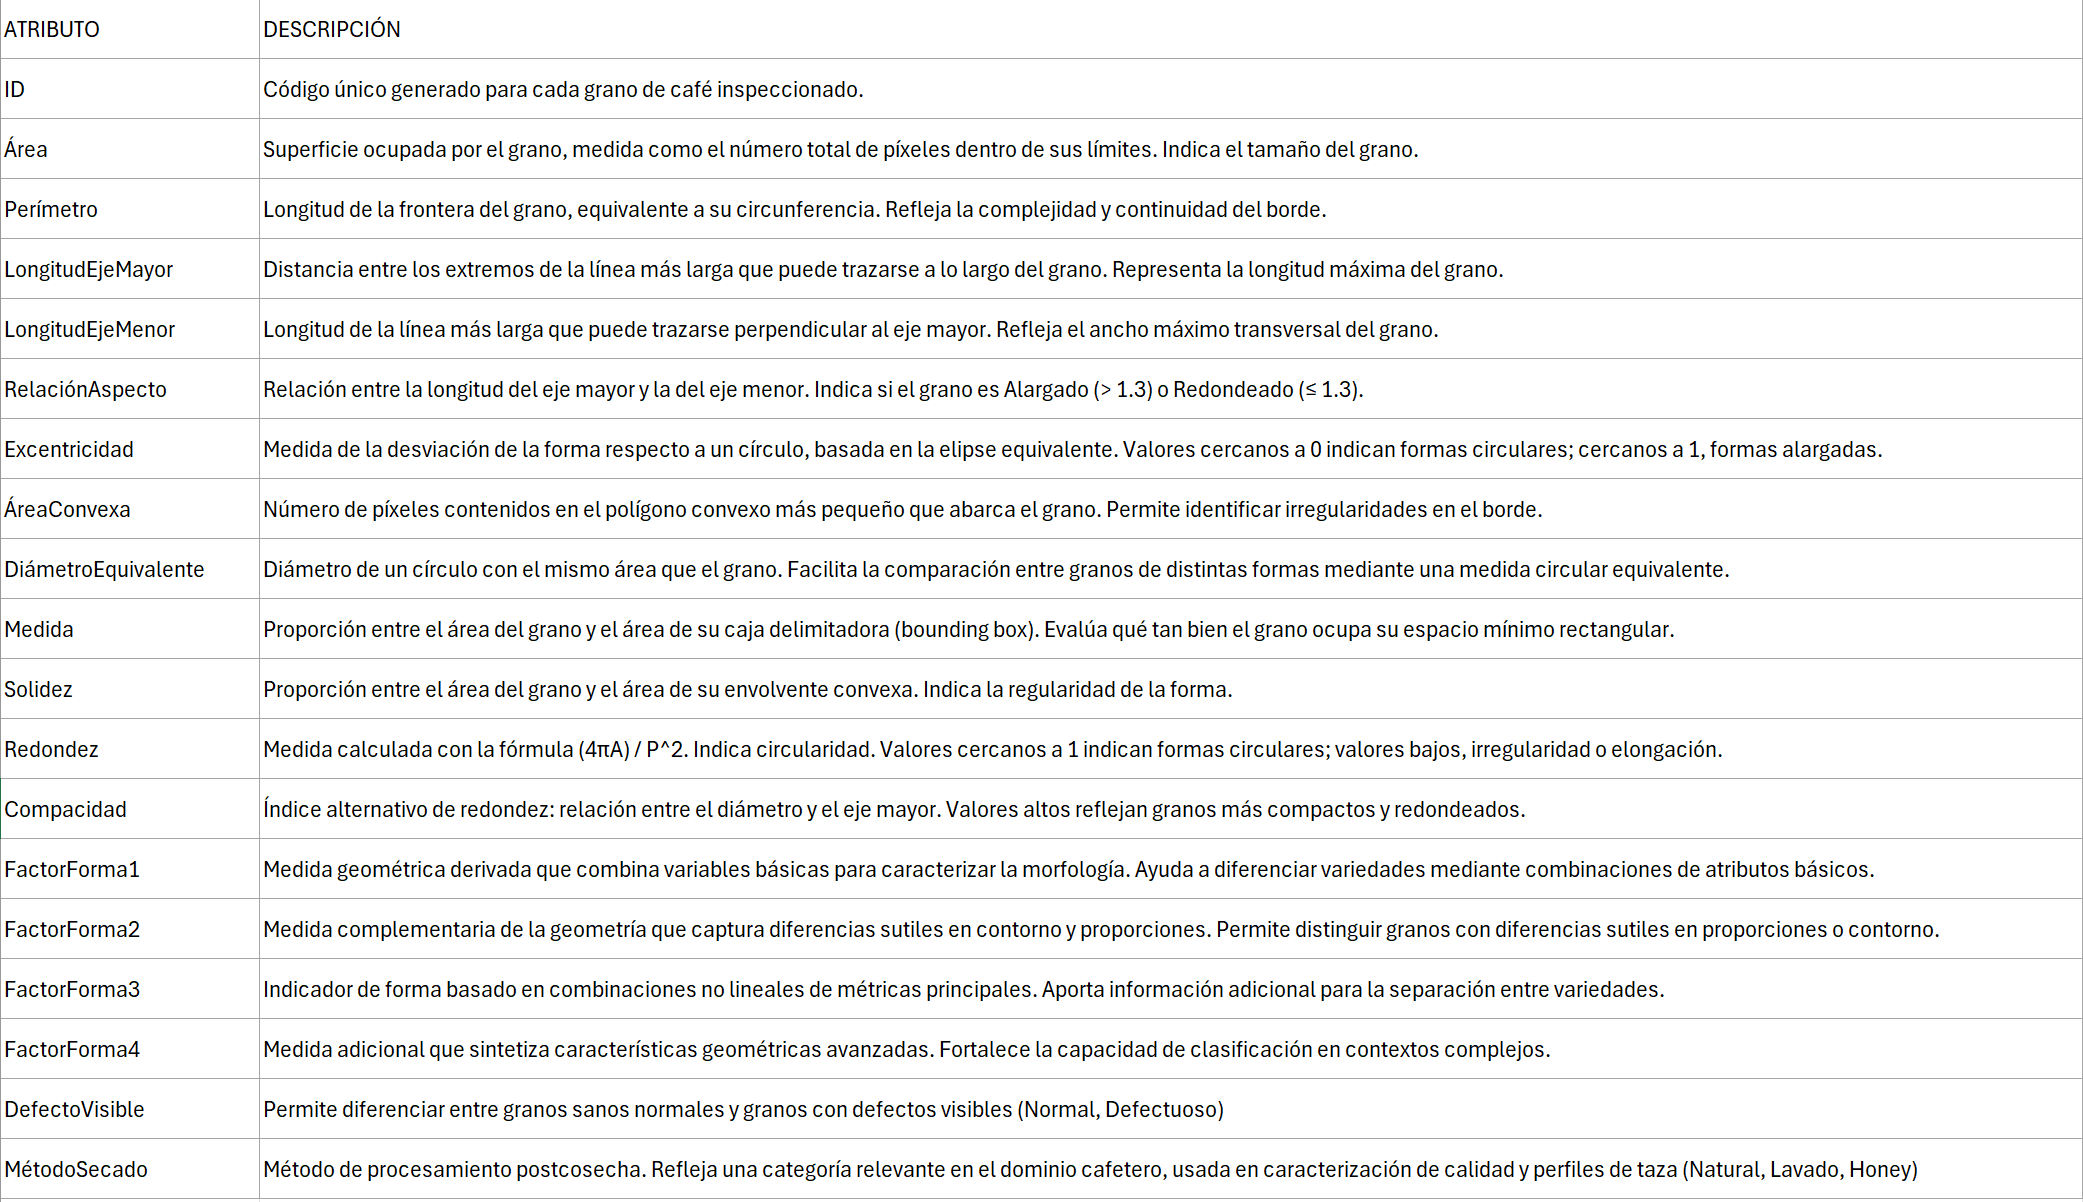

A continuación se confirman los tipos de datos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

Relación aspecto, DefectoVisible y MétodoSecado son un strings por lo que aparecen de tipo object. Los demás son números. 

En cuanto a las estadisticas de las variables númericas se tiene que:

In [5]:
df.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Se puede ver desviaciones estandares muy altas para el área, el perimetro, las longitudes y el diametro. Esto puede ser un primer indicio de datos atipicos, por lo que se van a revisar los graficos de boxplot para ver mejor la distribución de los datos.

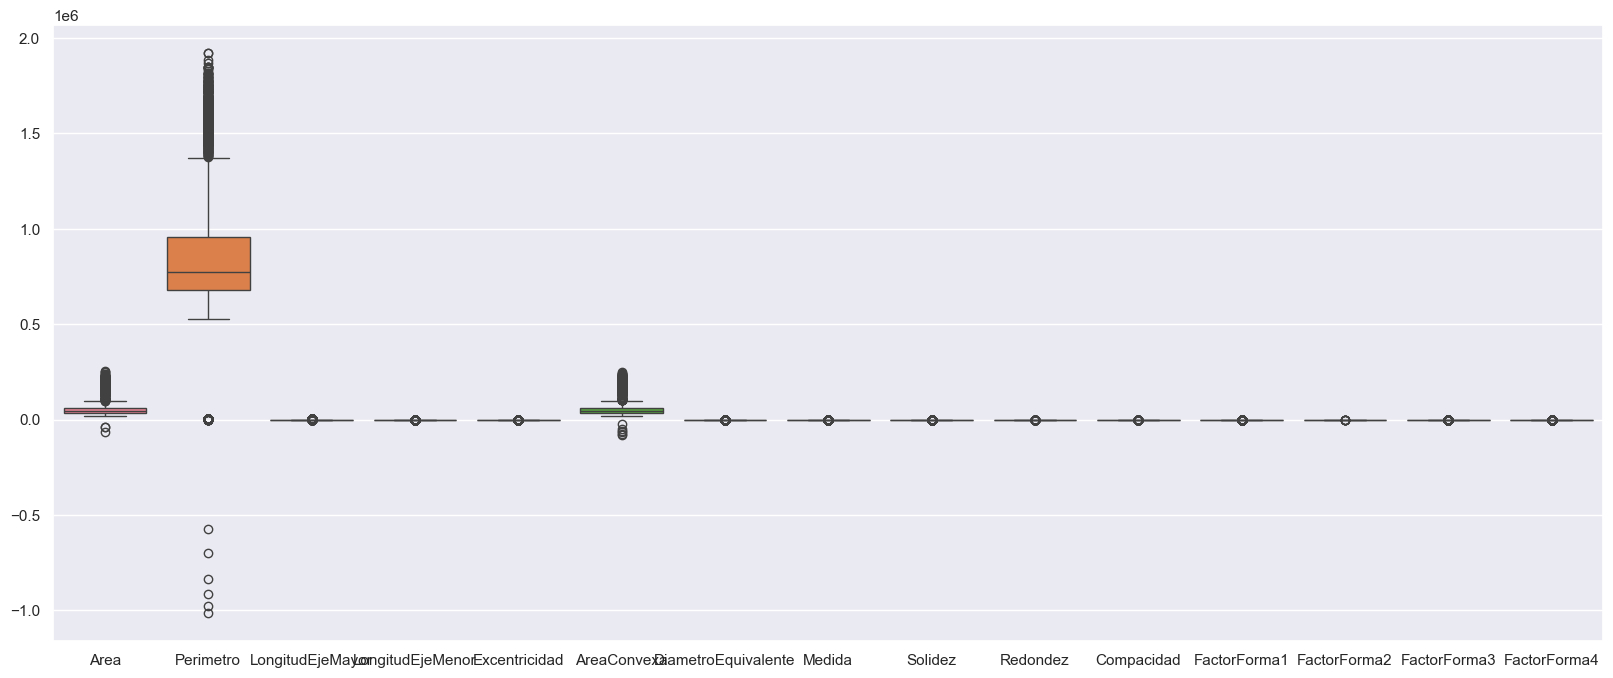

In [6]:


fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

Al estar en escalas diferentes se pierde información para varias graficas, pero se puede apreciar distribuciones raras para el area y el perimetro. A continuación se grafican de forma individual.

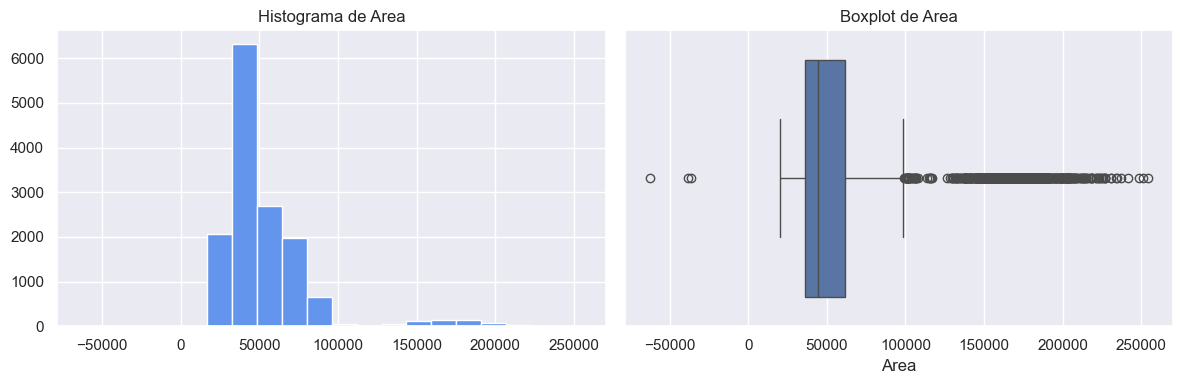

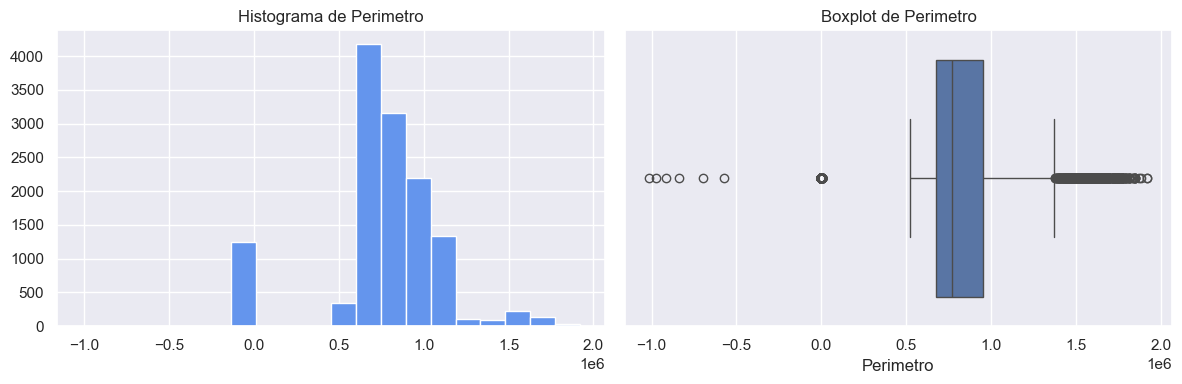

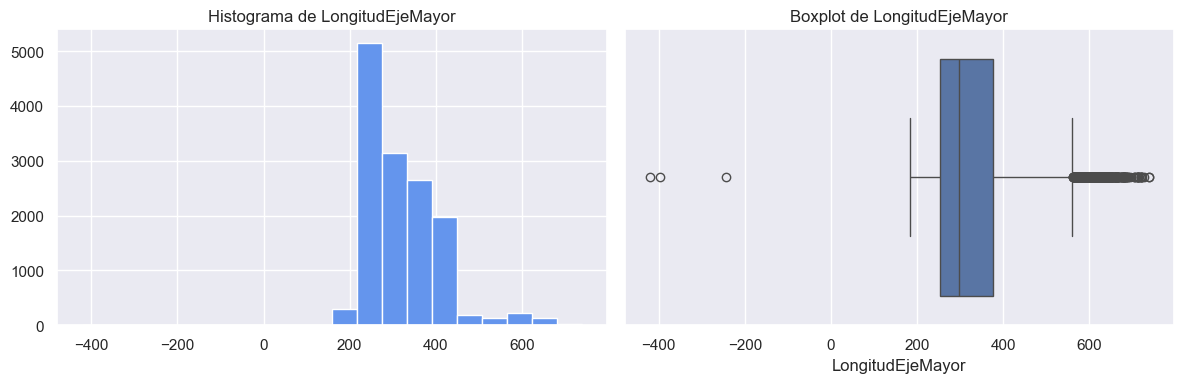

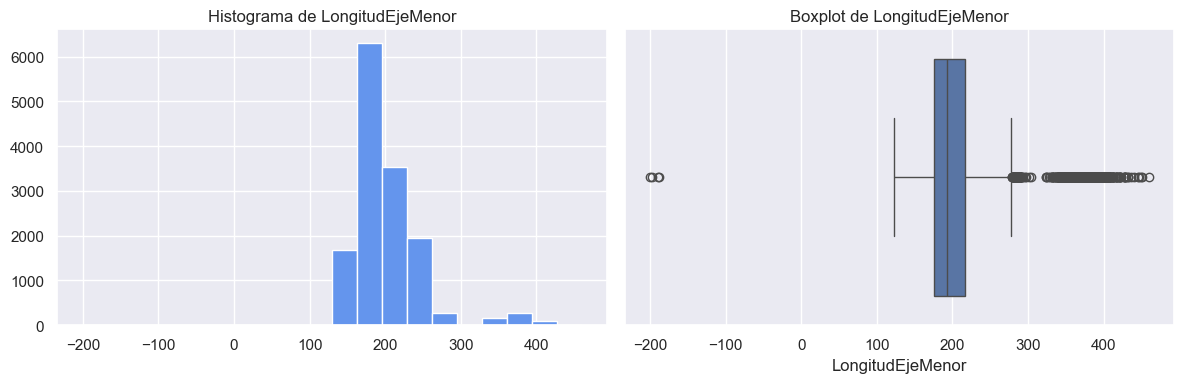

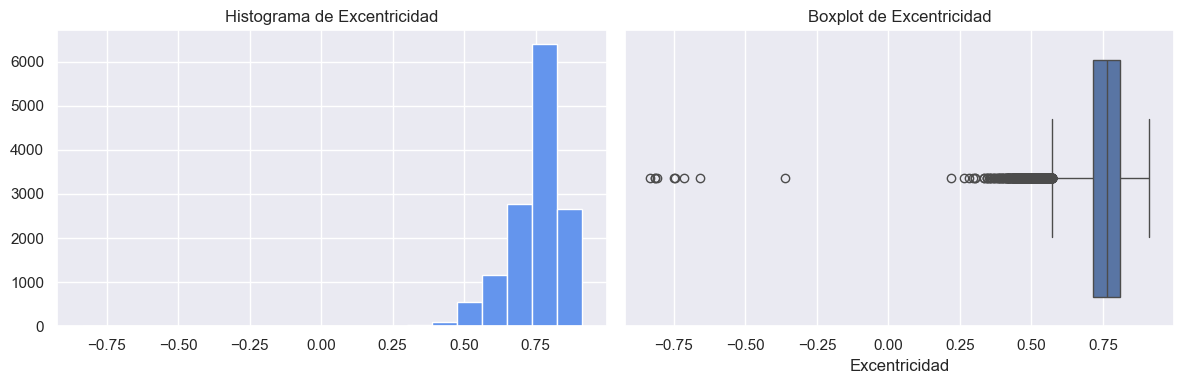

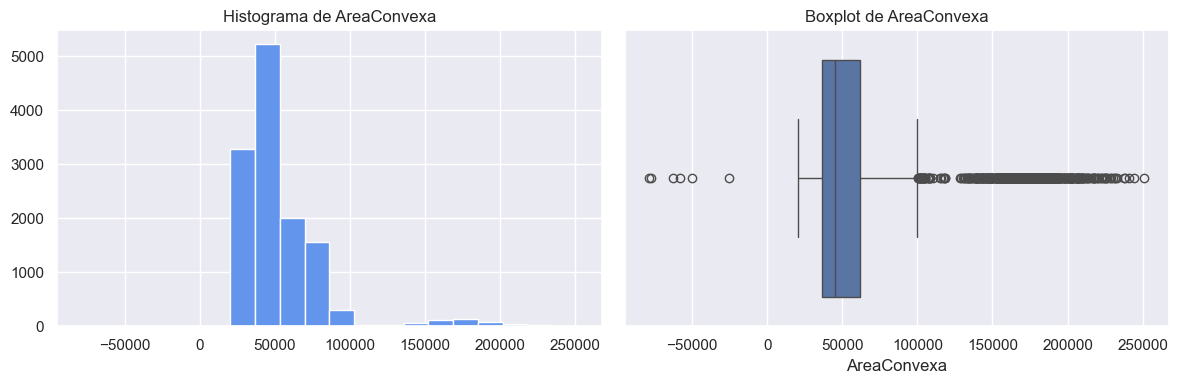

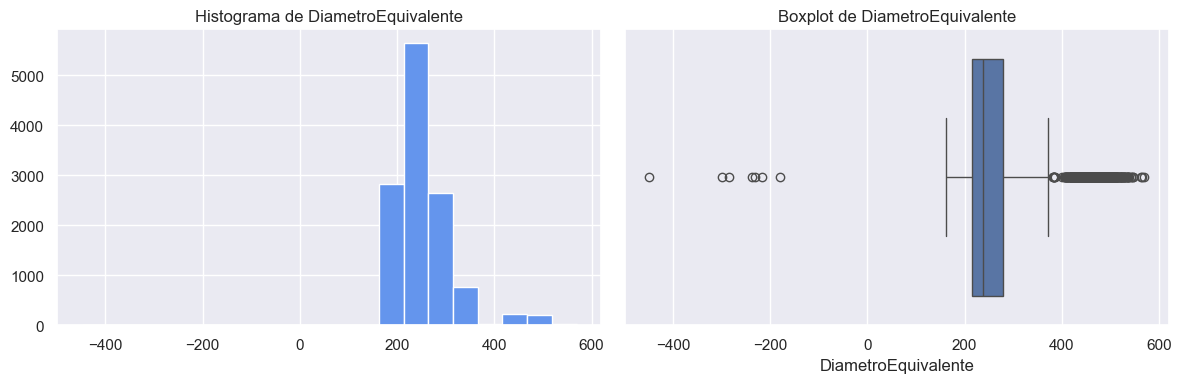

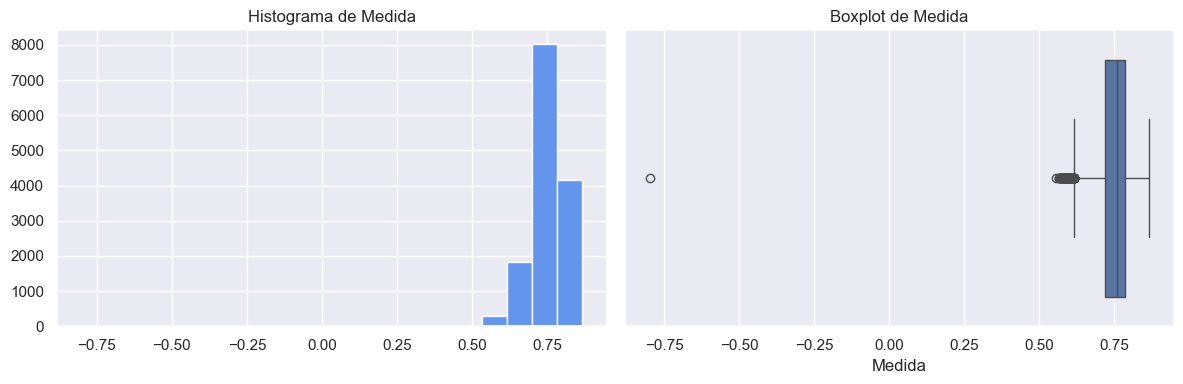

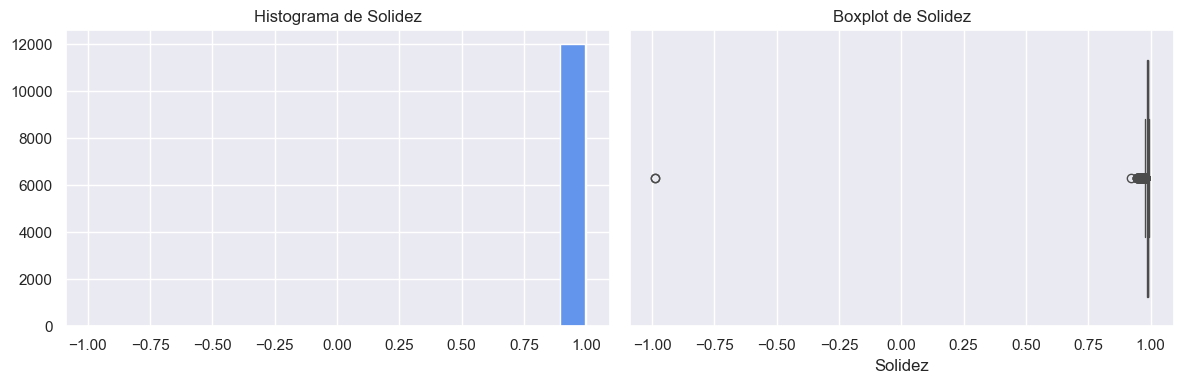

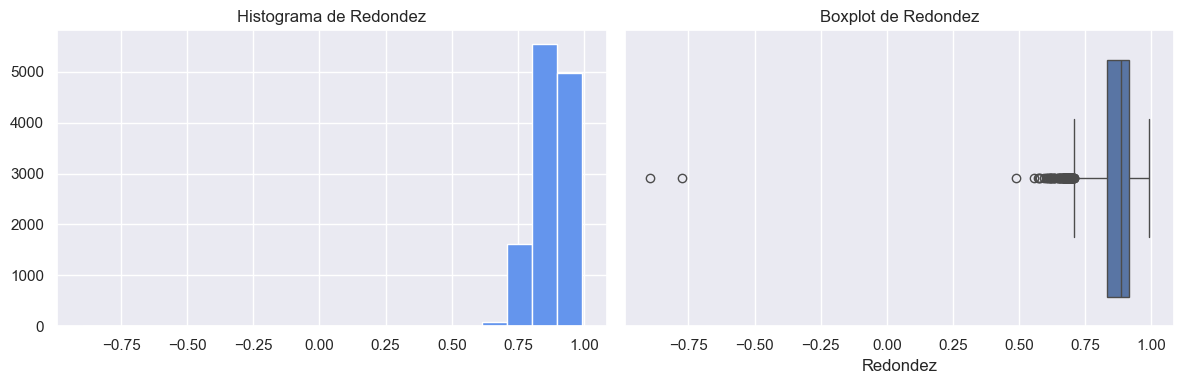

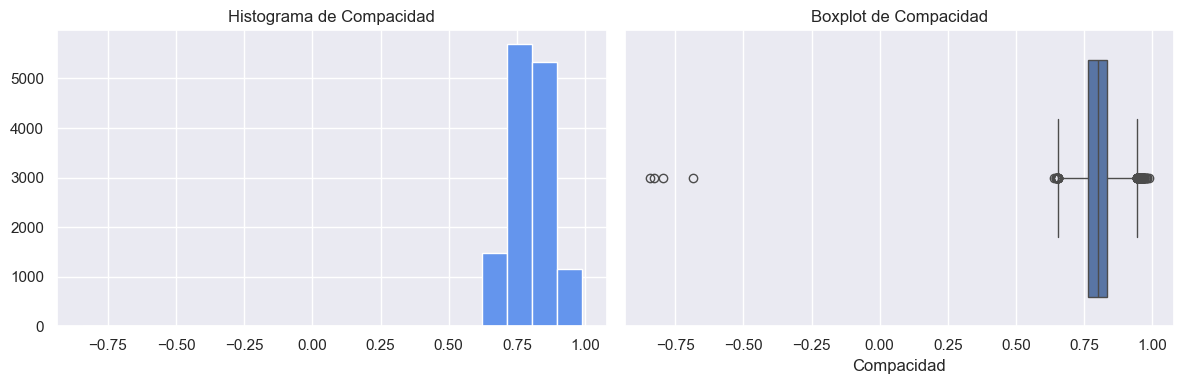

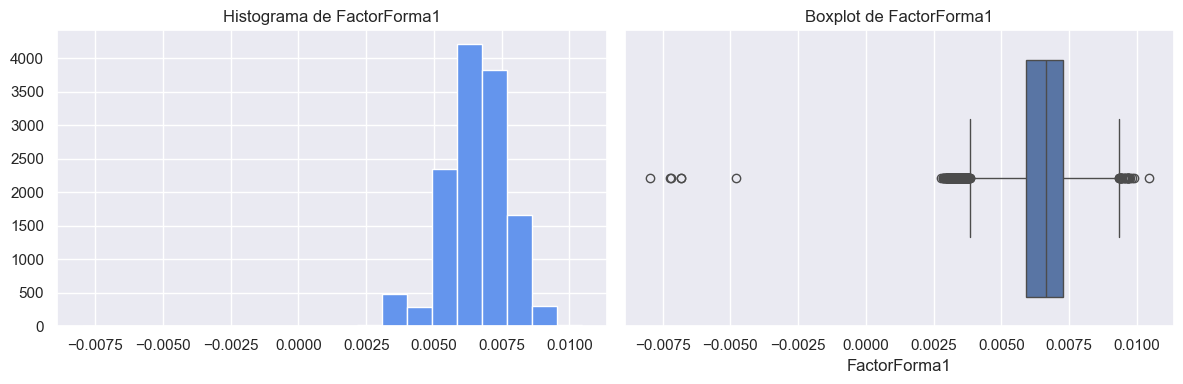

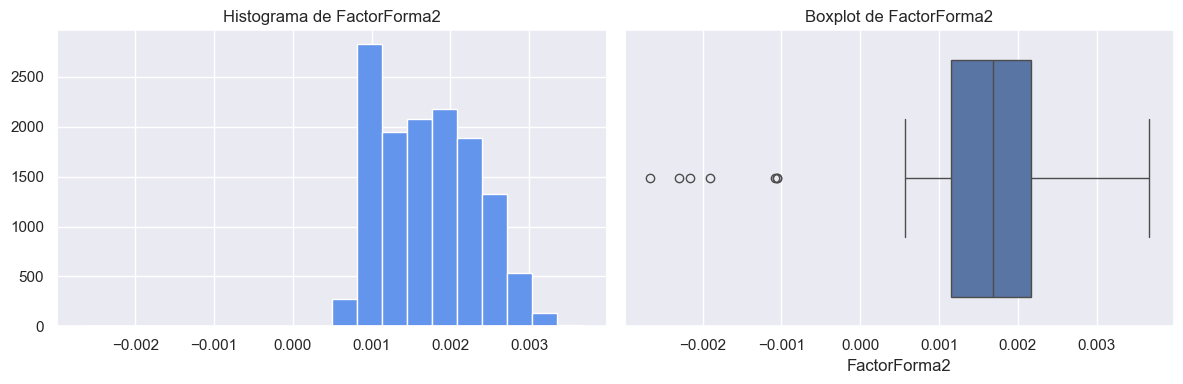

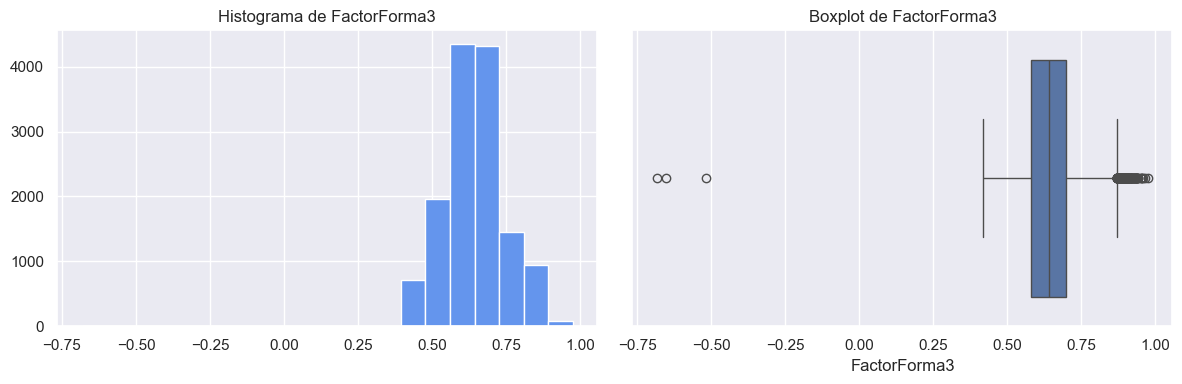

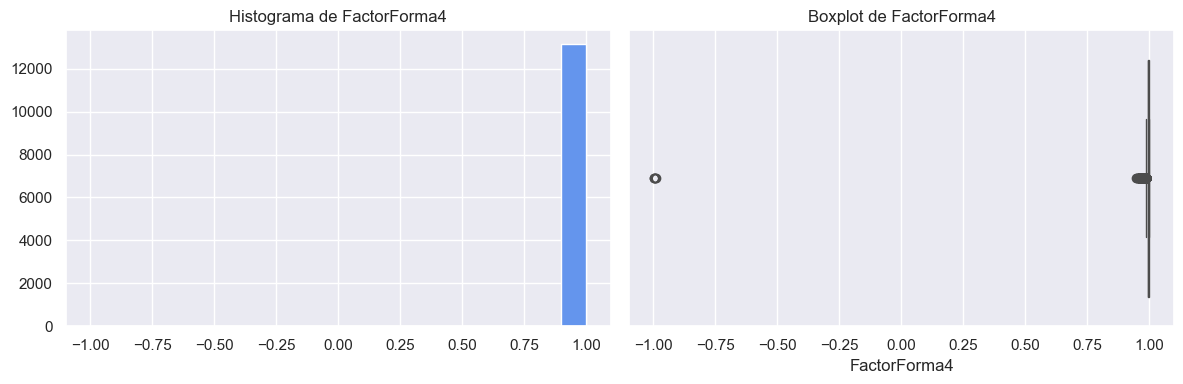

In [7]:

# Histogramas y boxplots para variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    df[col].dropna().hist(ax=axes[0], bins=20, color='cornflowerblue')
    axes[0].set_title(f"Histograma de {col}")
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

Se puede ver que la mayoria de las categorias tienen valores negativos, se va a tener que limpiar eso. También se puede evidenciar la existencia de valores fuera de los rangos normales. Por ejemplo, areas de más de 200 mil pixeles o perimetros mayores a 10 mil pixeles. Se puede pensar inicialmente que es mejor desechar ambas categorias del dataset ya que pueden distorcionar los resultados y no representan el tamaño real del objeto pues se ven afectados por la cantidad de zoom.

Ahora se van a ver las variables categoricas y su distribución.


In [8]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove("ID") 
if cat_cols:
    for col in cat_cols:
        print(f"\n---- value_counts() para '{col}' (top 20) ----")
        print(df[col].value_counts(dropna=False).head(20))


---- value_counts() para 'RelacionAspecto' (top 20) ----
RelacionAspecto
Alargado      12047
Redondeado     1739
NaN             466
alargado         29
redondeado       10
Name: count, dtype: int64

---- value_counts() para 'DefectoVisible' (top 20) ----
DefectoVisible
Normal    9096
NaN       2935
normal    2260
Name: count, dtype: int64

---- value_counts() para 'MétodoSecado' (top 20) ----
MétodoSecado
Lavado     6260
Natural    4639
lavado     1552
natural    1176
NaN         587
Honey        64
honey        13
Name: count, dtype: int64


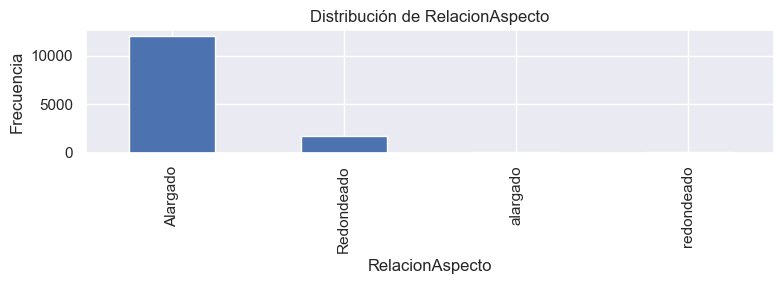

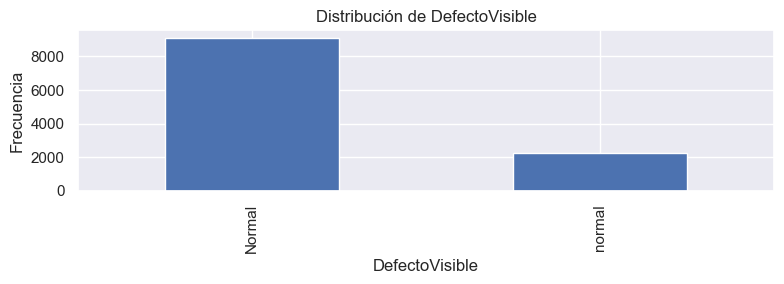

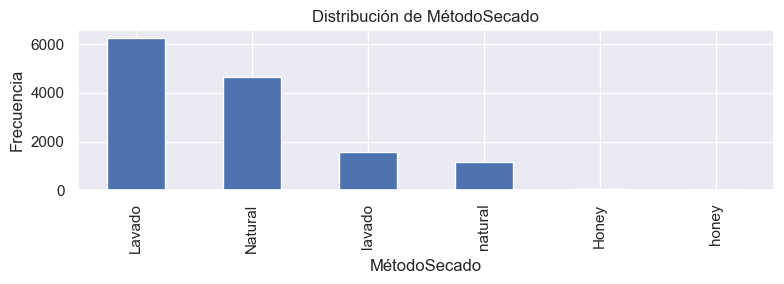

In [9]:
if cat_cols:
    for col in cat_cols:
        if df[col].nunique() <= 20:
            plt.figure(figsize=(8,3))
            df[col].value_counts().plot(kind='bar')
            plt.title(f"Distribución de {col}")
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            plt.tight_layout()
            plt.show()

Se ve que defecto visible no aporta información ya que tiene dos categorías: normal y Normal, se puede eliminar. Las demás categorías sí muestran información acerca de a qué clase podrían pertenecer los granos aunque cuentan con columnas que estan repetidas por lo que hay que arreglar eso antes de hacer cuaquier transformación. 

Ahora se va a ver la correlación de las variables entre si, para ver si alguna sobra.

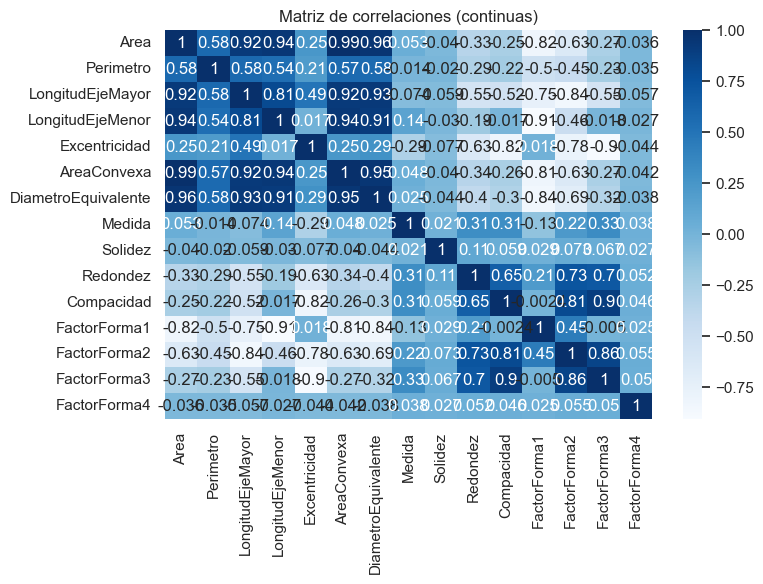

In [10]:
def es_binaria(serie):
    vals = serie.dropna().unique()
    return len(vals) <= 2

cont_cols = [c for c in num_cols if not es_binaria(df[c])]
bin_cols  = [c for c in num_cols if es_binaria(df[c])]

if len(cont_cols) > 1:
    corr = df[cont_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='Blues')
    plt.title("Matriz de correlaciones (continuas)")
    plt.tight_layout()
    plt.show()

Se van a dejar las variables que tengan menos de 0.85 de correlación. 

Se puede ver una gran correlación entre DiametroEquivalente, AreaConvexa, LongitudEjeMenor, LongitudEjeMayor y Area. Se va a utilizar la variable DiametroEquivalente para representarlas.

También se puede simplificar la Compacidad y FactorForma2 que pueden ser representadas por FactorForma3.

Ahora, se va a ver la unicidad de los datos.


In [11]:
print(df.duplicated(keep = False).sum())

922


hay 922 filas repetidas.

Finalmente se van a revisar la cantidad de nulos que hay por categoría.

In [12]:
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64


Con respecto al tamaño del dataframe se puede ver que la cantidad de los nulos de las columnas que se van a utilizar no es tan significativa.

# Preparación de los Datos

Inicialmente se va a crear un nuevo dataset con las columnas a utilizar.

In [13]:
columnas_a_mantener = ["DiametroEquivalente", 
                    "Excentricidad", 
                    "Medida", 
                    "RelacionAspecto",         
                    "FactorForma3",
                    "Medida",
                    "Solidez",     
                    "Redondez",       
                    "Compacidad",     
                    "FactorForma1",   
                    "FactorForma2",   
                    "FactorForma3",   
                    "FactorForma4",
                    "MétodoSecado",]

columnas_a_usar = [c for c in columnas_a_mantener if c in df.columns]

df_og = df[columnas_a_usar].copy()
print(df_og.head())


   DiametroEquivalente  Excentricidad    Medida RelacionAspecto  FactorForma3  \
0           254.413847            NaN  0.804762        alargado      0.503578   
1           282.689948            NaN  0.703995        Alargado      0.477237   
2           276.314692       0.860886  0.661581        Alargado      0.504326   
3                  NaN       0.872446  0.799695        Alargado      0.486941   
4           223.760747       0.685326  0.775392        Alargado      0.726511   

     Medida   Solidez  Redondez  Compacidad  FactorForma1  FactorForma2  \
0  0.804762  0.983840  0.748853    0.709632      0.007052      0.001103   
1  0.703995  0.978272  0.782807    0.690824      0.006520      0.000916   
2  0.661581  0.984485  0.762259    0.710159      0.006489      0.001018   
3  0.799695  0.989998  0.821376    0.697811      0.006893      0.001008   
4  0.775392  0.989084  0.907867    0.852356      0.006676      0.002174   

   FactorForma3  FactorForma4 MétodoSecado  
0      0.503578  

Se borran las filas duplicadas ya que no aportan información

In [14]:

df = df_og.copy().drop_duplicates()
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 0


Teniendo en cuenta que si hay valores nulos, el modelo puede recibir información incompleta o errónea, lo que introduce ruido y afecta la calidad de las predicciones, se tomó la decisión de borrar los valores nulos.

In [15]:
print(df.shape)
df = df.dropna()
df.shape

(13820, 14)


(5537, 14)

Ahora se revisa la consistencia y validez de los datos, enfocandose principalmente en las columnas categoricas

In [16]:
print(df.columns)
# RelacionAspecto
df['RelacionAspecto'] = (
    df['RelacionAspecto']
    .str.strip()        # quita espacios extra
    .str.lower()        # pasa todo a minúsculas
)

# MétodoSecado
df['MétodoSecado'] = (
    df['MétodoSecado']
    .str.strip()
    .str.lower()
)

df['RelacionAspecto'] = df['RelacionAspecto'].str.capitalize()
df['MétodoSecado'] = df['MétodoSecado'].str.capitalize()

print(df['RelacionAspecto'].unique())
print(df['MétodoSecado'].unique())

Index(['DiametroEquivalente', 'Excentricidad', 'Medida', 'RelacionAspecto',
       'FactorForma3', 'Medida', 'Solidez', 'Redondez', 'Compacidad',
       'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4',
       'MétodoSecado'],
      dtype='object')
['Alargado' 'Redondeado']
['Natural' 'Lavado' 'Honey']


One hot encoding para las variables categoricas

In [17]:
import pandas as pd

# Aseguramos que estén en string
df['RelacionAspecto'] = df['RelacionAspecto'].astype(str)
df['MétodoSecado'] = df['MétodoSecado'].astype(str)

# One Hot Encoding
df = pd.get_dummies(
    df,
    columns=['RelacionAspecto', 'MétodoSecado'],
    prefix=['Aspecto', 'Secado'], dtype=np.int8
)

# Revisar nuevas columnas creadas
print(df.head())
print("Columnas nuevas:", [c for c in df.columns if "Aspecto" in c or "Secado" in c])


    DiametroEquivalente  Excentricidad    Medida  FactorForma3    Medida  \
2            276.314692       0.860886  0.661581      0.504326  0.661581   
4            223.760747       0.685326  0.775392      0.726511  0.775392   
7            341.138341       0.828912  0.809604      0.554696  0.809604   
10           225.529096       0.528489  0.772032      0.847583  0.772032   
11           223.954130       0.702894  0.725291      0.709299  0.725291   

     Solidez  Redondez  Compacidad  FactorForma1  FactorForma2  FactorForma3  \
2   0.984485  0.762259    0.710159      0.006489      0.001018      0.504326   
4   0.989084  0.907867    0.852356      0.006676      0.002174      0.726511   
7   0.992109  0.852938    0.744779      0.005011      0.000951      0.554696   
10  0.989155  0.939268    0.920643      0.006132      0.002717      0.847583   
11  0.988854  0.887964    0.842199      0.006751      0.002095      0.709299   

    FactorForma4  Aspecto_Alargado  Aspecto_Redondeado  Secado

Se estandariza los valores numéricos para evitar que las diferentes unidades afecten a la selección de los grupos.

In [18]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cont_cols = num_cols

scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()
df_std = df.copy()
if cont_cols:
    df_std[cont_cols] = scaler_std.fit_transform(df_std[cont_cols])
print("\nVariables numéricas estandarizadas (StandardScaler):")
print(df_std[cont_cols].head())



Variables numéricas estandarizadas (StandardScaler):
    DiametroEquivalente  Excentricidad    Medida    Medida  FactorForma3  \
2              0.396394       1.082577 -1.670227 -1.670227     -1.387708   
4             -0.497261      -0.613355  0.478926  0.478926      0.819649   
7              1.498689       0.773704  1.124960  1.124960     -0.887292   
10            -0.467191      -2.128414  0.415471  0.415471      2.022473   
11            -0.493972      -0.443646 -0.467154 -0.467154      0.648651   

    FactorForma3    Medida    Medida   Solidez  Redondez  ...  FactorForma1  \
2      -1.387708 -1.670227 -1.670227 -0.573611 -1.726719  ...     -0.052562   
4       0.819649  0.478926  0.478926  0.412433  0.538635  ...      0.108953   
7      -0.887292  1.124960  1.124960  1.061022 -0.315934  ...     -1.326916   
10      2.022473  0.415471  0.415471  0.427593  1.027170  ...     -0.360001   
11      0.648651 -0.467154 -0.467154  0.363191  0.228993  ...      0.173374   

    FactorForm

# 2. Algoritmo KMeans - (Juan Diego Niebles)

A continuación se va a realizar el modelo KMeans. Este algoritmo divide los grupos de forma radial con una cantidad dada de centroides. Para poder encontrar el mejor modelo se van a considerar dos aspectos. El primero es la estandarización de los valores de los datos para que no se vean afectados por diferentes unidades. El segundo es la disminución de la dimensionalidad mediante Principal Component Analysis (PCA) con el fin de que sea más fácil visualizar los resultados y entender la agrupación.

c:\Users\diego\anaconda3\envs\bi_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


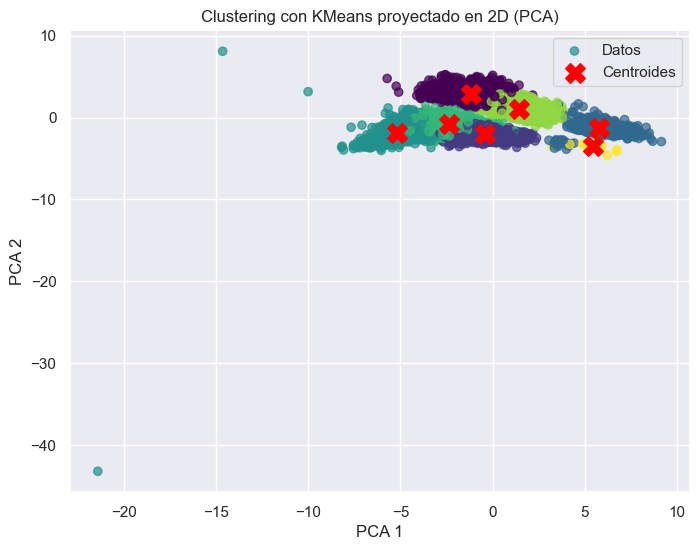

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Tomamos solo columnas numéricas
num_cols = df_std.select_dtypes(include=[np.number]).columns.tolist()
df_tracks_prep = df_std[num_cols].copy()

# Aplicamos KMeans
kmeans = KMeans(n_clusters=7, random_state=0)
clusters = kmeans.fit_predict(df_tracks_prep)

# Reducimos dimensiones a 2D con PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_tracks_prep)

# Graficamos los clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap="viridis", alpha=0.7, label="Datos")

# Graficamos los centroides proyectados en PCA
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c="red", s=200, marker="X", label="Centroides")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering con KMeans proyectado en 2D (PCA)")
plt.legend()
plt.show()


Inicialmente se trabajó con 7 clusters, pero se va a revisar si realmente es el número ideal con el método del codo.

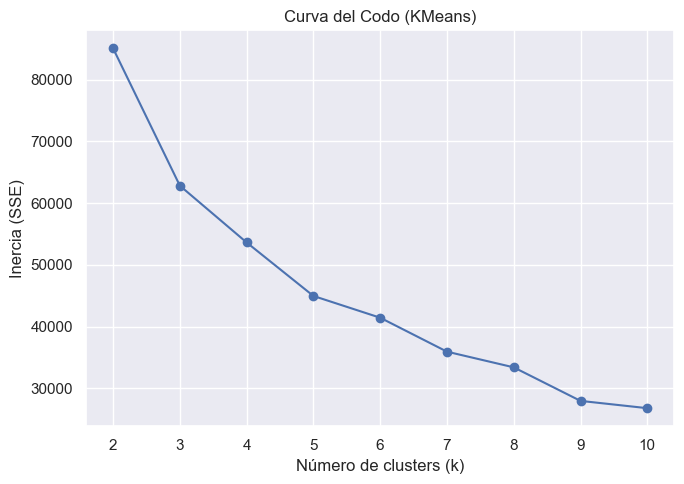

In [20]:
# === ELBOW + SILHOUETTE PARA KMEANS ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

num_cols = df_std.select_dtypes(include=[np.number]).columns.tolist()
X = df_std[num_cols].dropna().values  # matriz (n_samples, n_features)

X_elbow = X

# Rango de k a evaluar
k_range = range(2, 11)  # 2..10

# inercia
inertias = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit(X_elbow)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(list(k_range), inertias, marker='o')
plt.xticks(list(k_range))
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Curva del Codo (KMeans)')
plt.tight_layout()
plt.show()

Se evidencia que los grandes cambios se encuentran en 5 y 7. Pero al no ser tan claro se utilizará el método de la silueta para una mejor elección.

In [21]:
def maybe_sample(X, max_samples=6000, random_state=42):
    if X.shape[0] > max_samples:
        rng = np.random.default_rng(random_state)
        idx = rng.choice(X.shape[0], size=max_samples, replace=False)
        return X[idx]
    return X

Mejor k por silueta media ≈ 7 (score=0.383)


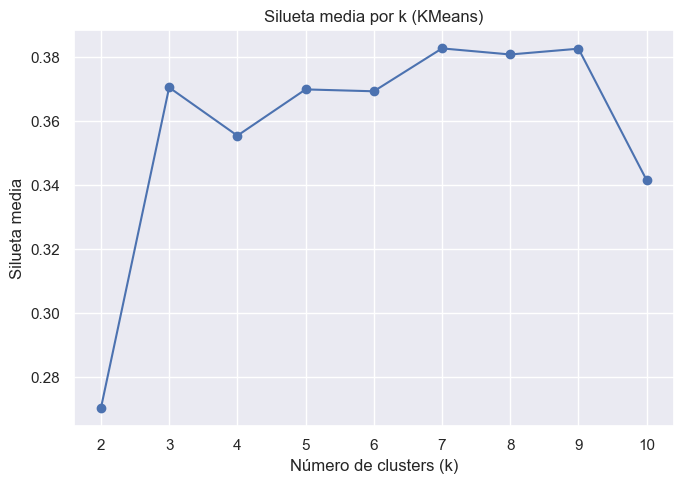

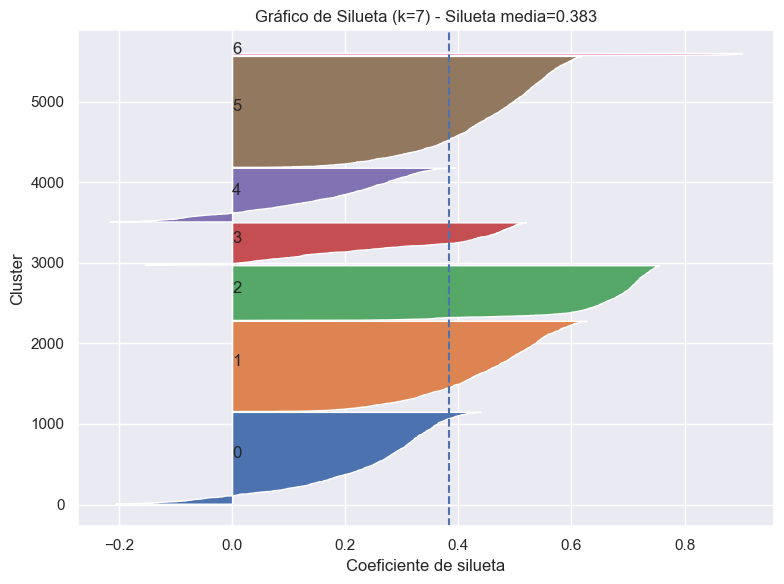

In [22]:


# Elegir K por silueta
sil_avgs = []
labels_por_k = {}
model_por_k = {}
X_sil = maybe_sample(X)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = km.fit_predict(X_sil)
    sil_avg = silhouette_score(X_sil, labels)
    sil_avgs.append(sil_avg)
    labels_por_k[k] = labels
    model_por_k[k] = km

best_k = list(k_range)[int(np.argmax(sil_avgs))]
print(f"Mejor k por silueta media ≈ {best_k} (score={sil_avgs[np.argmax(sil_avgs)]:.3f})")

# Curva de silueta media vs k 
plt.figure(figsize=(7,5))
plt.plot(list(k_range), sil_avgs, marker='o')
plt.xticks(list(k_range))
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silueta media')
plt.title('Silueta media por k (KMeans)')
plt.tight_layout()
plt.show()


# Grafico de silueta para el mejor
k_for_sil = best_k  
labels = labels_por_k[k_for_sil]
silhouette_vals = silhouette_samples(X_sil, labels)
silhouette_avg = silhouette_score(X_sil, labels)

fig, ax = plt.subplots(figsize=(8,6))
y_lower = 10
for i in range(k_for_sil):
    ith_vals = silhouette_vals[labels == i]
    ith_vals.sort()
    size_i = ith_vals.shape[0]
    y_upper = y_lower + size_i
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals)
    ax.text(0.0, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10  # espacio entre clusters

ax.axvline(x=silhouette_avg, linestyle='--')
ax.set_xlabel('Coeficiente de silueta')
ax.set_ylabel('Cluster')
ax.set_title(f'Gráfico de Silueta (k={k_for_sil}) - Silueta media={silhouette_avg:.3f}')
plt.tight_layout()
plt.show()

Se llega a que el mejor número de clusters es k=7 ya que es donde se consigue una mejor silueta media, la cual es de 0.383. Sin embargo, esta silueta es relativamente baja y no agrupa de la mejor manera los clusters. Es posible evidenciar que hay datos que incluso están más cerca a otros centroides que no son los propios. Esto es posible por la forma en la que funciona ya que intenta escoger de forma radial los centroides, aunque se puede ver afectado por datos muy cercanos y aquellos que son atipicos. Así, se puede llegar a la conclusión de que este modelo es capaz de identificar varios grupos con cierto grado de precisión, pero es importante evaluar el desempeño de más algoritmos para tomar la decisión de cuál modelo escoger.

# Agglomerative clustering (Esteban Benavides)

Agglomerative clustering es un algoritmo de clustering jerarquico que comienza tratando cada punto como su propio cluster y en cada paso fusiona la dos clusters mas cercanos hassta llegar al numero de clusters deseados.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


num_cols = df_std.select_dtypes(include=[np.number]).columns.tolist()
X_full = df_std[num_cols].dropna().values


Para n_clusters = 2, Silhouette = 0.435
Para n_clusters = 3, Silhouette = 0.370
Para n_clusters = 4, Silhouette = 0.330
Para n_clusters = 5, Silhouette = 0.352
Para n_clusters = 6, Silhouette = 0.365
Para n_clusters = 7, Silhouette = 0.364
Para n_clusters = 8, Silhouette = 0.374
Para n_clusters = 9, Silhouette = 0.375
Para n_clusters = 10, Silhouette = 0.378


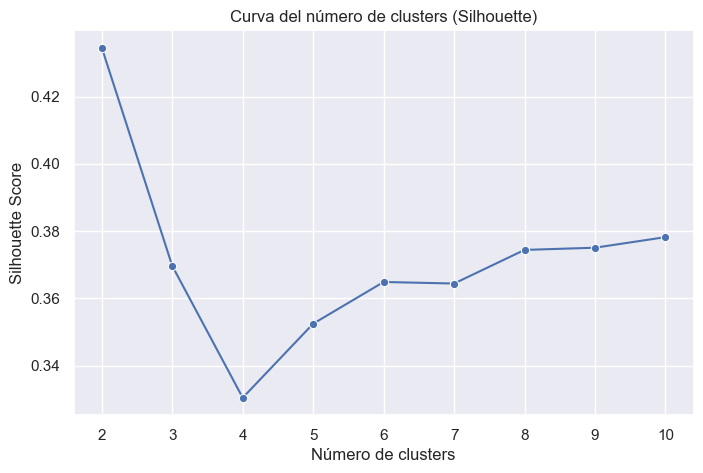

In [24]:
range_n_clusters = list(range(2, 11))  
silhouette_avgs = []

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = clustering.fit_predict(X_full)

    silhouette_avg = silhouette_score(X_full, labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, Silhouette = {silhouette_avg:.3f}")

# Graficar curva del "codo" con silueta
plt.figure(figsize=(8,5))
sns.lineplot(x=range_n_clusters, y=silhouette_avgs, marker="o")
plt.title("Curva del número de clusters (Silhouette)")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.show()

Como se puede ver, con el silhoutte score se define que tan bien asignado esta un punto a su cluster, en donde se busca obetener el valor mas alto posible del score, en este caso basandonos en esta metrica el numero optimo de clusters seria 2

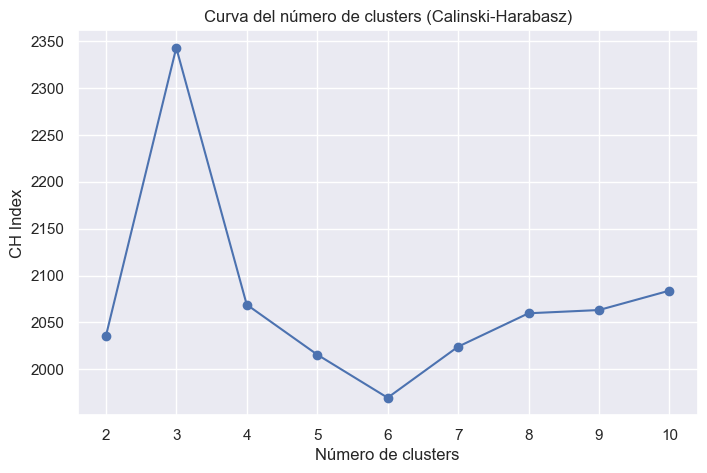

In [25]:
from sklearn.metrics import calinski_harabasz_score


range_n_clusters = range(2, 11)
ch_scores = []

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = clustering.fit_predict(X_full)
    ch_scores.append(calinski_harabasz_score(X_full, labels))

plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, ch_scores, marker="o")
plt.title("Curva del número de clusters (Calinski-Harabasz)")
plt.xlabel("Número de clusters")
plt.ylabel("CH Index")
plt.show()

En este caso usando la merica de CH, la cual mide la drelacion de dispercion enter clusters y dentro de clusters, el valor optimo de clusters seria 3 (buscamos un valor alto de la metrica)

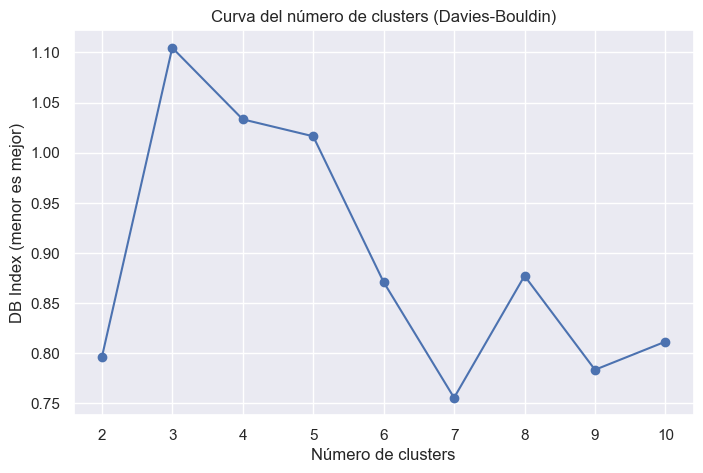

In [26]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = clustering.fit_predict(X_full)
    db_scores.append(davies_bouldin_score(X_full, labels))

plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, db_scores, marker="o")
plt.title("Curva del número de clusters (Davies-Bouldin)")
plt.xlabel("Número de clusters")
plt.ylabel("DB Index (menor es mejor)")
plt.show()

Por ultimo la metrica de DB evalua la similitud entre cada cluster y su cluster mas parecido, aqui se busca minimizar el valor de la metrica. Basado en la grafica el numero optimo de clusters seria 7, sin embargo, el valor de 2 clusters no es malo. Por lo tanto se tomo la decision de usar 2 clusters para el algoritmo de clusters final

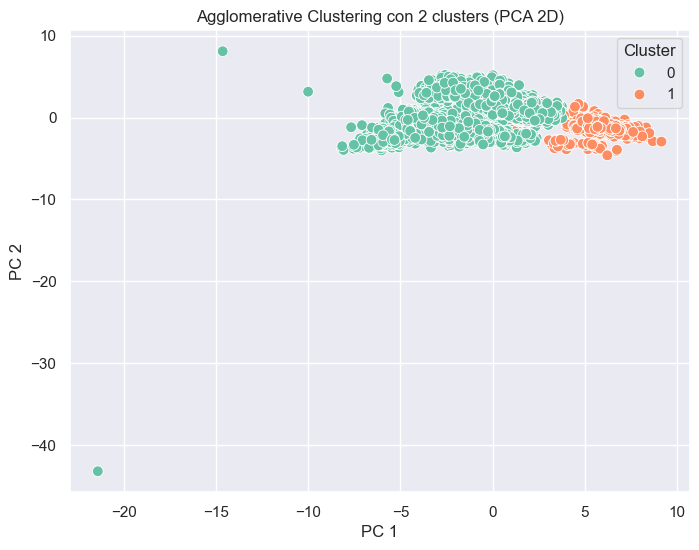

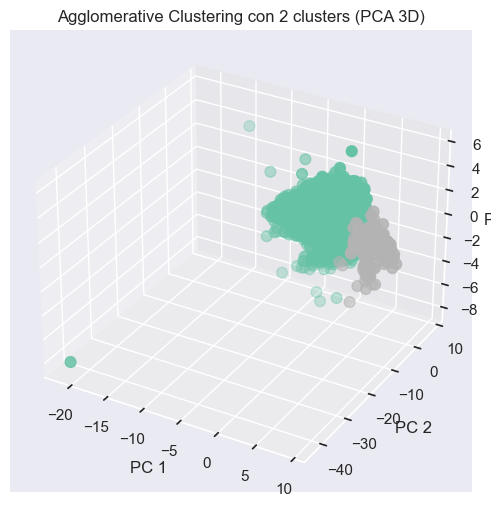

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


n_clusters = 2  


clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
labels = clustering.fit_predict(X_full)


df_std["Cluster"] = labels  


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set2", s=60)
plt.title(f"Agglomerative Clustering con {n_clusters} clusters (PCA 2D)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()


pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_full)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], 
                     c=labels, cmap="Set2", s=60)

ax.set_title(f"Agglomerative Clustering con {n_clusters} clusters (PCA 3D)")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()


Silhouette Score promedio: 0.435


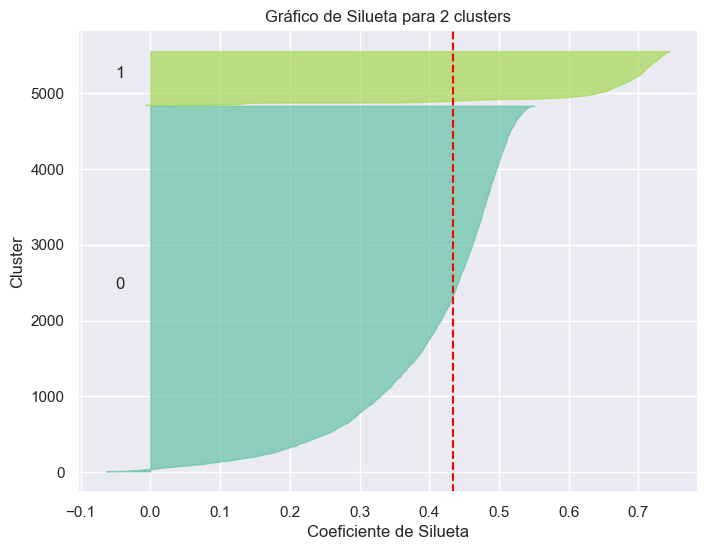

In [28]:
silhouette_avg = silhouette_score(X_full, labels)
sample_silhouette_values = silhouette_samples(X_full, labels)

print(f"Silhouette Score promedio: {silhouette_avg:.3f}")


fig, ax = plt.subplots(figsize=(8,6))

y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_vals = sample_silhouette_values[labels == i]
    cluster_silhouette_vals.sort()

    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = plt.cm.Set2(i / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10


ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_title(f"Gráfico de Silueta para {n_clusters} clusters")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Cluster")
plt.show()

Como se puede observar en los resultado, basandonos en el grafico de silueta para 2 clusters, los clusters tienen valores de silueta por encima de 0.4 en una buena parte. Esto significa que los clusters estan bien definidos y el modelo logra agrupar los datos dentro de estos dos clusters con una separacion entre clusters decente

# 4. DBSCAN - (Miguel Castillo)

Número de clusters: 3
Puntos de ruido: 19


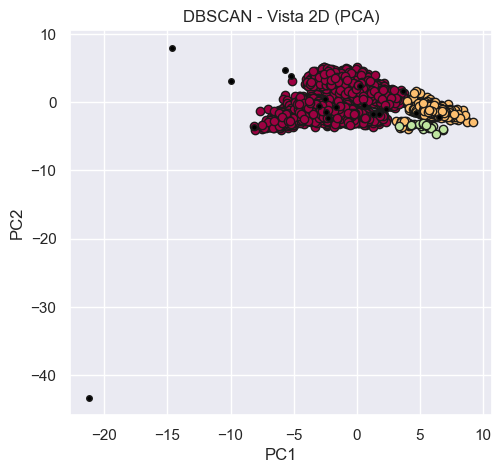

puntaje silhouette: 0.4292647945222574


In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Tomamos solo columnas numéricas
num_cols = df_std.select_dtypes(include=[np.number]).columns.tolist()
X_dbscan = df_std[num_cols].copy().values

# Implementación de DBSCAN
dbscan = DBSCAN(eps=4, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_dbscan)

n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)
print(f"Número de clusters: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")

final_labels = clusters_dbscan

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_dbscan)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
unique_labels = set(final_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Negro para ruido
    
    class_member_mask = (final_labels == k)
    xy = X_pca_2d[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k != -1 else 4)

plt.title('DBSCAN - Vista 2D (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

silhouette = silhouette_score(X_dbscan, final_labels)

print("puntaje silhouette: "+str(silhouette ))



En un primera aproccimacion con el algritmo nos podemos dar cuenta que la canttidad de clusters es decente y el puntaje silhouette no es malo pero estamos usando hiperparametros triviales y esto se puede mejorar. Lo primero que vamos hacer es sacar un Epsilon obtimo y  la cantidad minima de datos que se necesitan para hacer un closter.

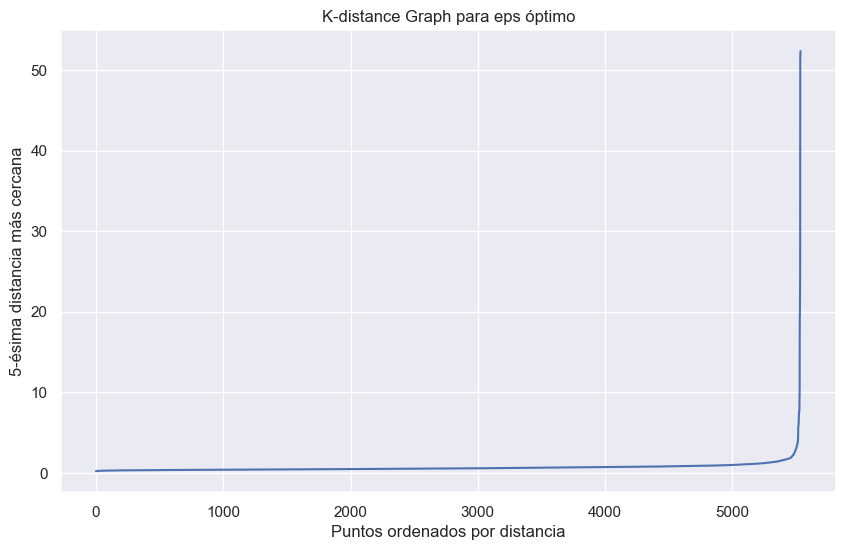

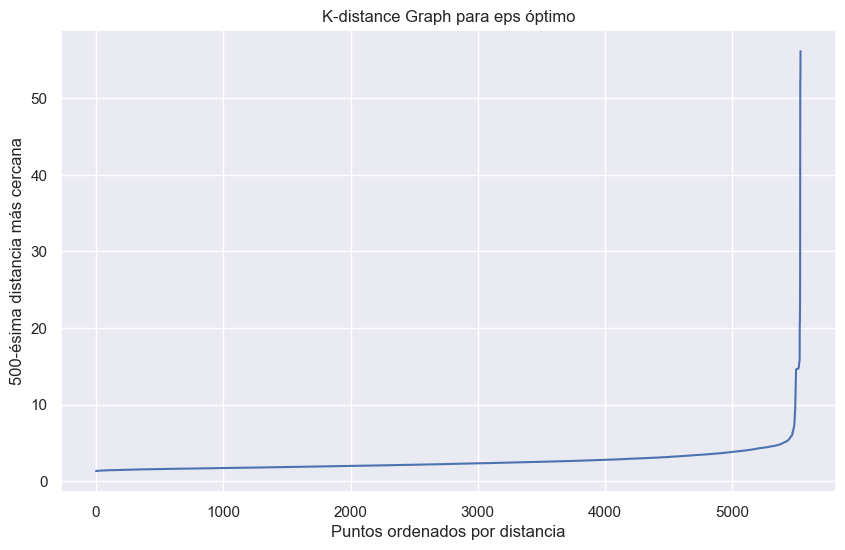

In [30]:
# Método k-distance para encontrar eps óptimo
from sklearn.neighbors import NearestNeighbors

# Calcular k-distance (k = min_samples)
k = 5  # min_samples recomendado
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_dbscan)
distances, indices = neighbors_fit.kneighbors(X_dbscan)

# Ordenar las distancias del k-ésimo vecino más cercano
distances = np.sort(distances[:, k-1], axis=0)

# Graficar para encontrar el "codo"
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph para eps óptimo')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel(f'{k}-ésima distancia más cercana')
plt.show()

# Calcular k-distance (k = min_samples)
k = 500  # min_samples recomendado
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_dbscan)
distances, indices = neighbors_fit.kneighbors(X_dbscan)

# Ordenar las distancias del k-ésimo vecino más cercano
distances = np.sort(distances[:, k-1], axis=0)

# Graficar para encontrar el "codo"
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph para eps óptimo')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel(f'{k}-ésima distancia más cercana')
plt.show()



Como nos podemos dar cuenta en la grafica con un minimo de 5 puntos por cluster el valor obtimo esta al rededor de 2 mientras que cuando k es 500 el valor obtimo esta al rededor de 6 por esto el rango de epsilon va a ser de 0.1 a 6 variendo cada 0.1 y el de k va a ser 5, 10, 50, 100, 500 para no ser tan estrictos en la cantidad de closters y si se pone más solo se va agnerear un cluster.

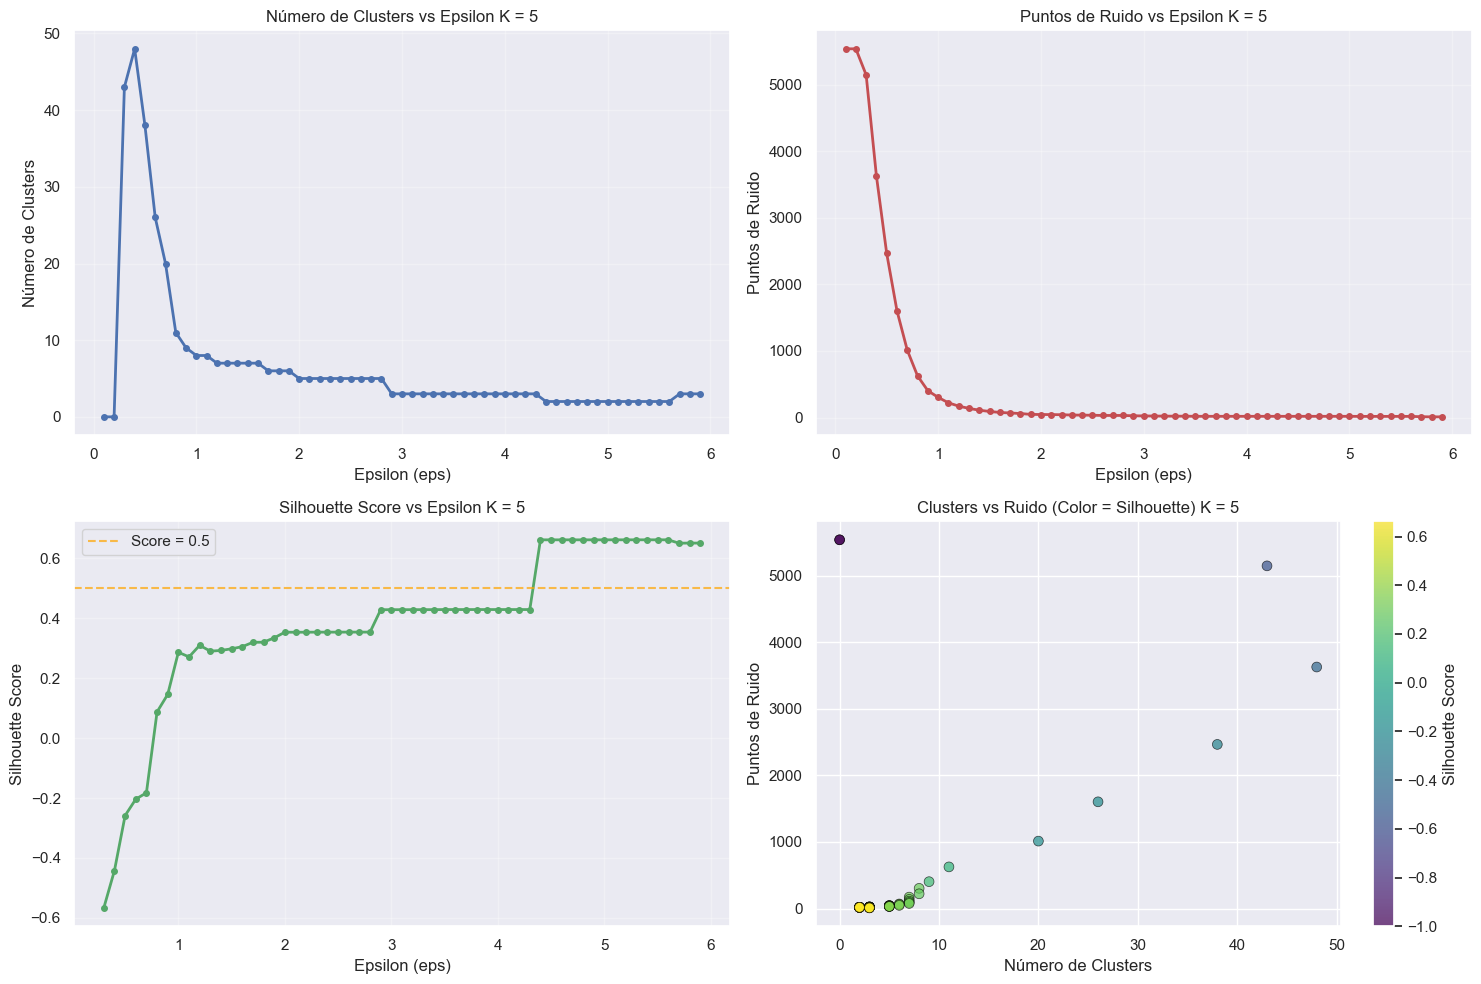

=== ANÁLISIS DE RESULTADOS ===
Mejor Silhouette Score: 0.662
  - eps: 5.1
  - clusters: 2.0
  - ruido: 18.0

Configuraciones balanceadas (2-5 clusters, <20% ruido, silhouette>0.3):
    eps  n_clusters  n_noise  silhouette
54  5.5           2       18    0.662139
51  5.2           2       18    0.662139
50  5.1           2       18    0.662139
53  5.4           2       18    0.662139
52  5.3           2       18    0.662139


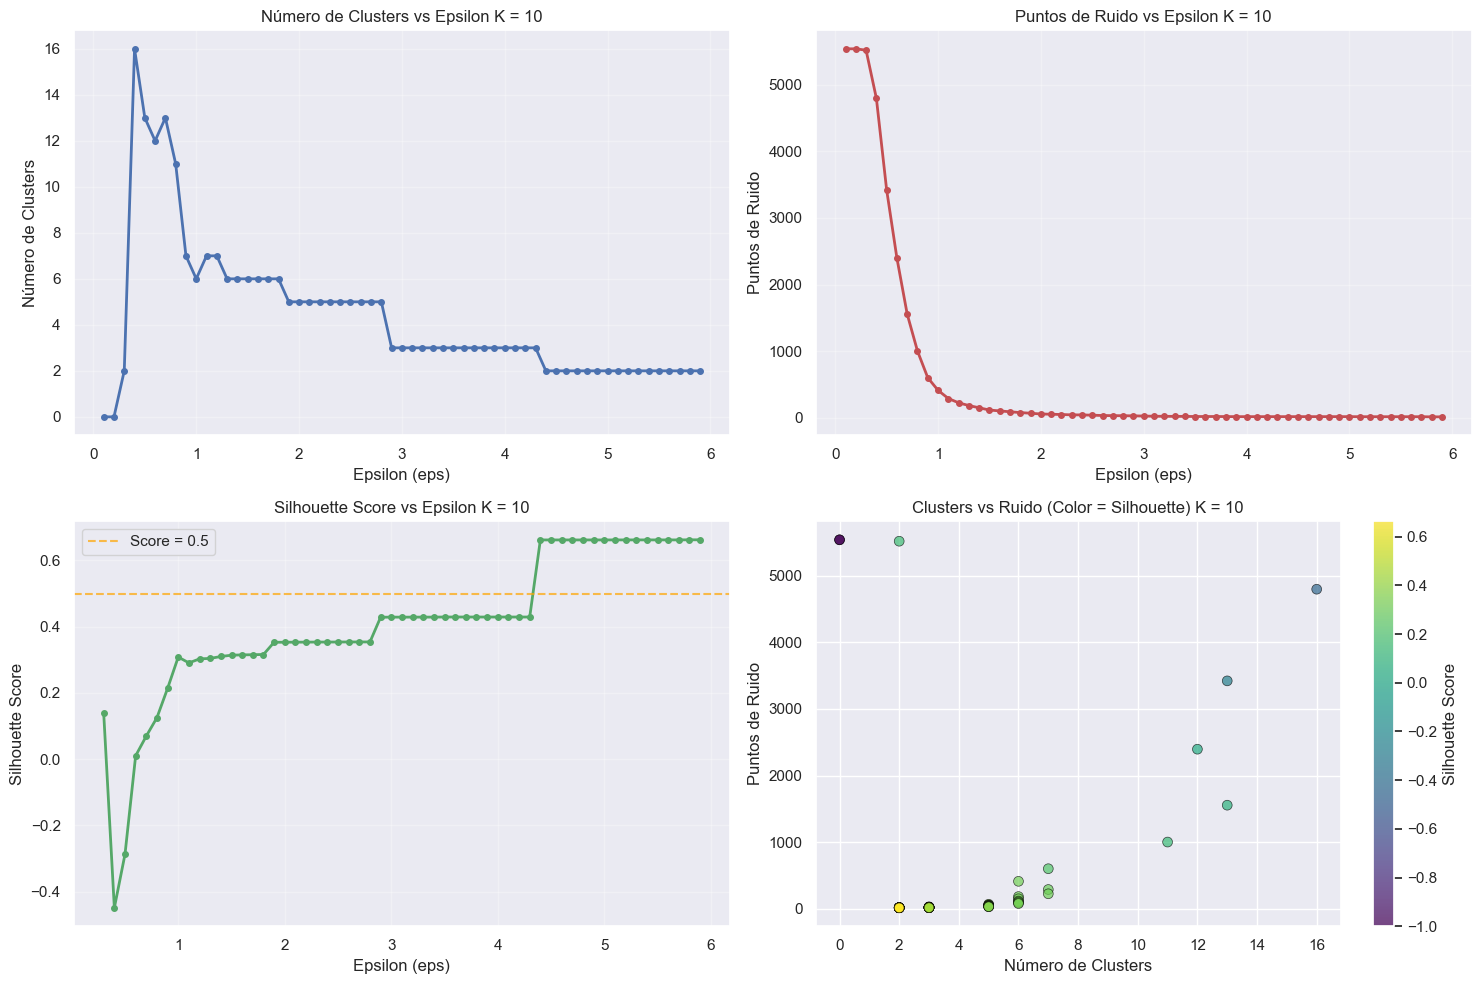

=== ANÁLISIS DE RESULTADOS ===
Mejor Silhouette Score: 0.662
  - eps: 5.8
  - clusters: 2.0
  - ruido: 16.0

Configuraciones balanceadas (2-5 clusters, <20% ruido, silhouette>0.3):
    eps  n_clusters  n_noise  silhouette
57  5.8           2       16    0.662441
58  5.9           2       16    0.662441
51  5.2           2       18    0.662139
52  5.3           2       18    0.662139
56  5.7           2       18    0.662139


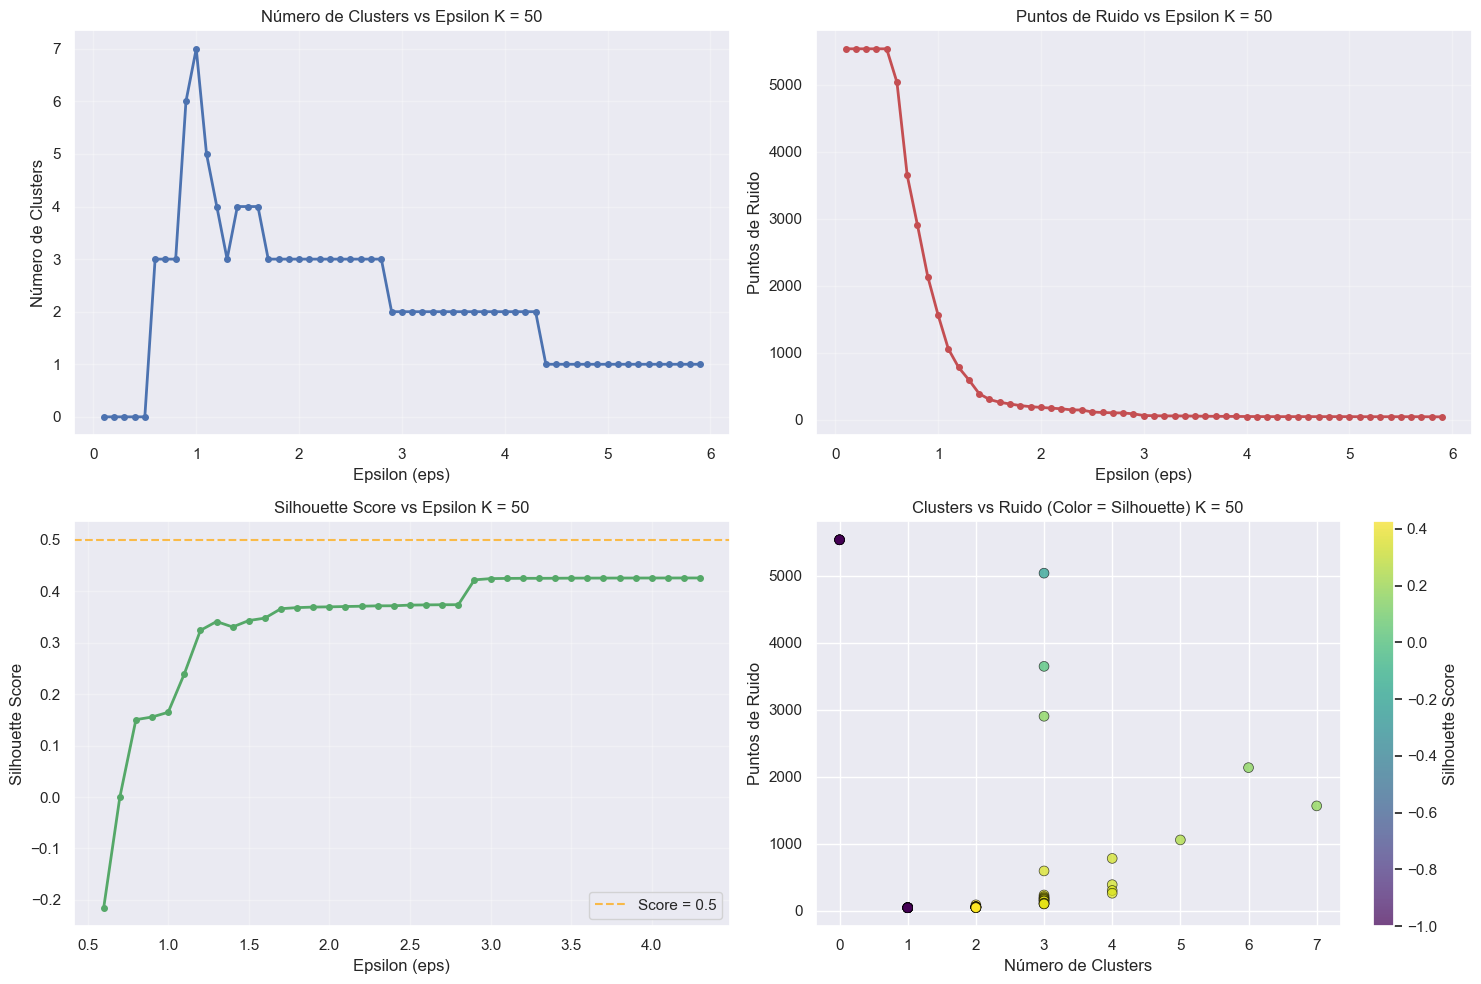

=== ANÁLISIS DE RESULTADOS ===
Mejor Silhouette Score: 0.426
  - eps: 4.2
  - clusters: 2.0
  - ruido: 46.0

Configuraciones balanceadas (2-5 clusters, <20% ruido, silhouette>0.3):
    eps  n_clusters  n_noise  silhouette
41  4.2           2       46    0.425828
42  4.3           2       46    0.425828
40  4.1           2       47    0.425782
39  4.0           2       48    0.425758
38  3.9           2       49    0.425728


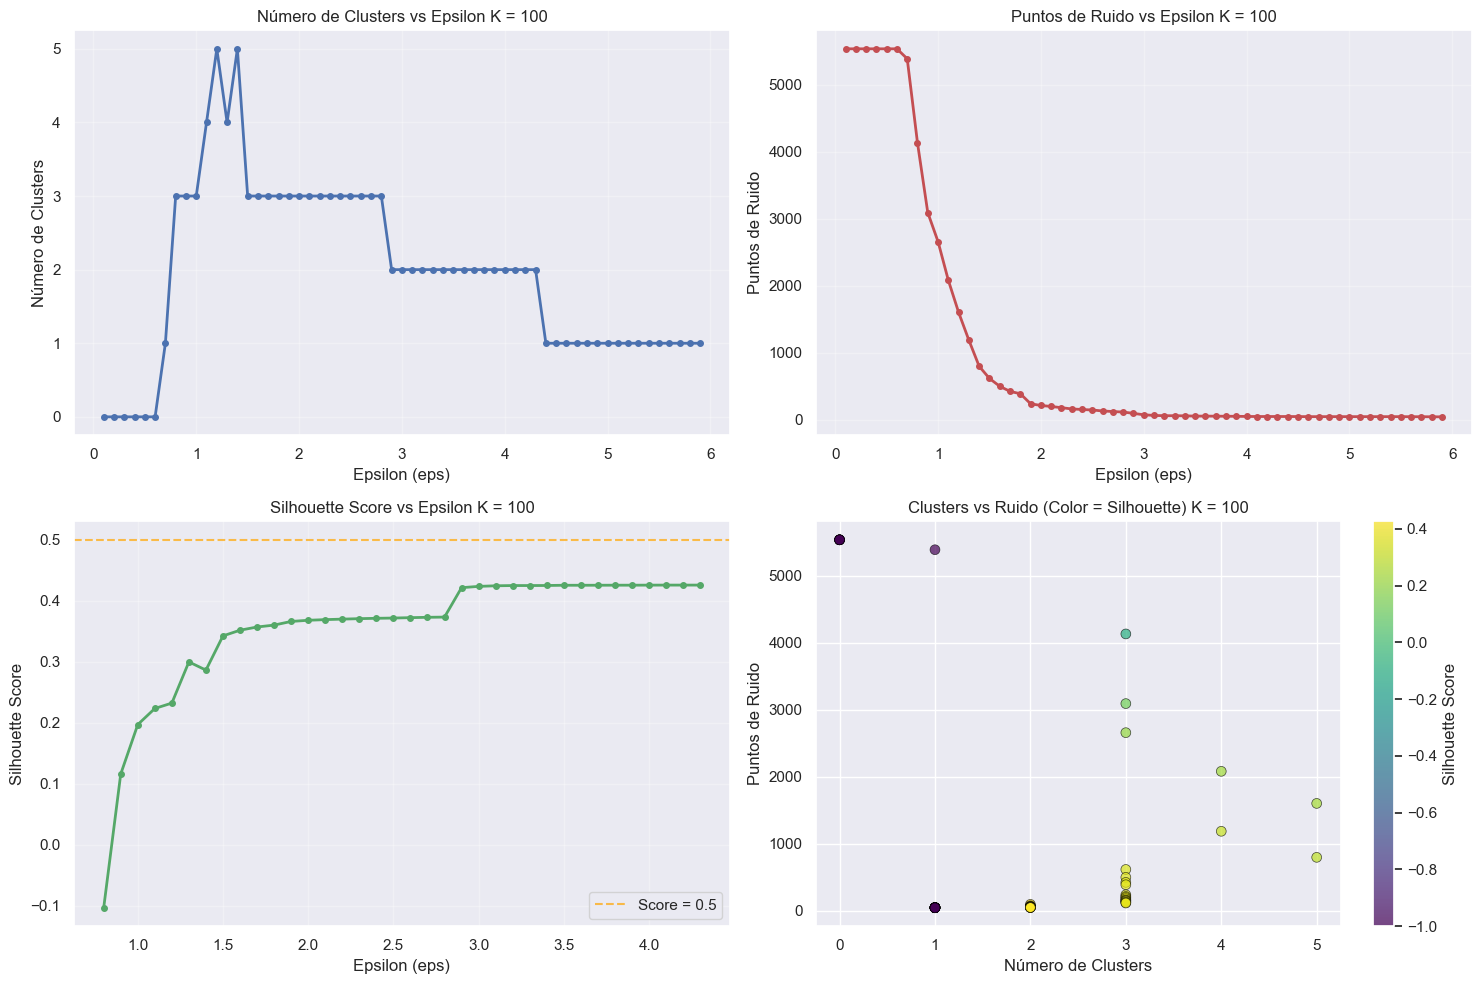

=== ANÁLISIS DE RESULTADOS ===
Mejor Silhouette Score: 0.426
  - eps: 4.1
  - clusters: 2.0
  - ruido: 48.0

Configuraciones balanceadas (2-5 clusters, <20% ruido, silhouette>0.3):
    eps  n_clusters  n_noise  silhouette
42  4.3           2       48    0.425758
40  4.1           2       48    0.425758
41  4.2           2       48    0.425758
39  4.0           2       49    0.425686
38  3.9           2       51    0.425609


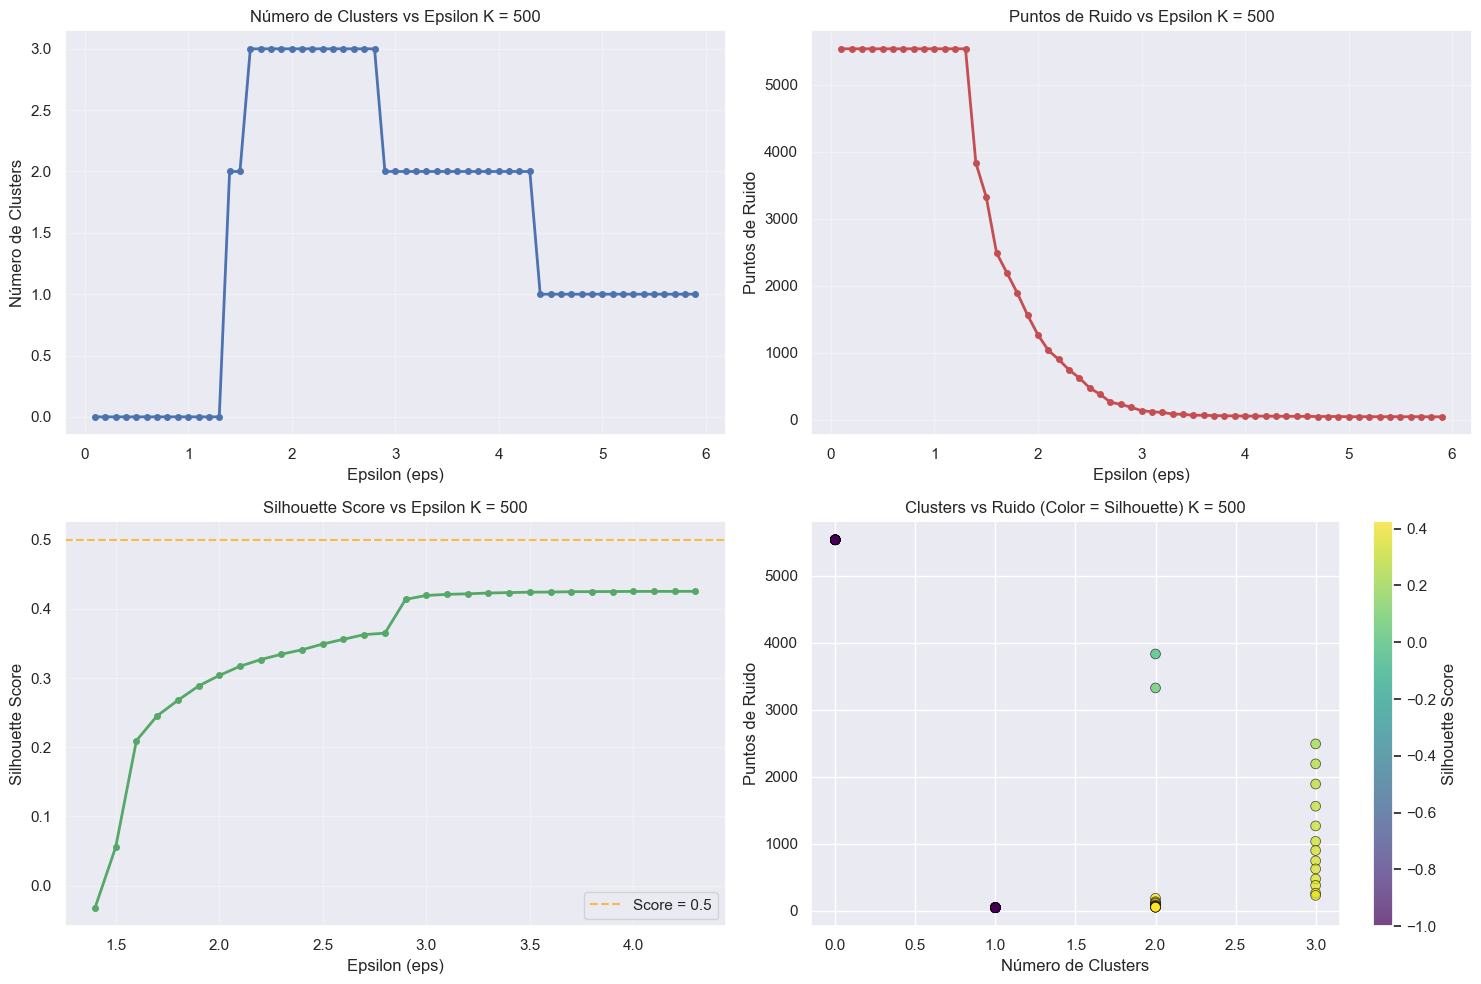

=== ANÁLISIS DE RESULTADOS ===
Mejor Silhouette Score: 0.426
  - eps: 4.3
  - clusters: 2.0
  - ruido: 53.0

Configuraciones balanceadas (2-5 clusters, <20% ruido, silhouette>0.3):
    eps  n_clusters  n_noise  silhouette
42  4.3           2       53    0.425539
40  4.1           2       55    0.425405
41  4.2           2       55    0.425405
39  4.0           2       56    0.425368
38  3.9           2       58    0.425230


In [31]:

eps_values = np.arange(0.1, 6, 0.1)
results = []
ks = [5, 10 , 50 , 100, 500 ]
for k in ks:
    results = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=k)
        labels = dbscan.fit_predict(X_dbscan)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1:
            silhouette = silhouette_score(X_dbscan, labels)
        else:
            silhouette = -1
        
        results.append({
            'eps': eps,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette
        })


    results_df = pd.DataFrame(results)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    axes[0, 0].plot(results_df['eps'], results_df['n_clusters'], 'b-o', linewidth=2, markersize=4)
    axes[0, 0].set_xlabel('Epsilon (eps)')
    axes[0, 0].set_ylabel('Número de Clusters')
    axes[0, 0].set_title('Número de Clusters vs Epsilon K = ' + str(k))
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].plot(results_df['eps'], results_df['n_noise'], 'r-o', linewidth=2, markersize=4)
    axes[0, 1].set_xlabel('Epsilon (eps)')
    axes[0, 1].set_ylabel('Puntos de Ruido')
    axes[0, 1].set_title('Puntos de Ruido vs Epsilon K = '+ str(k))
    axes[0, 1].grid(True, alpha=0.3)


    valid_results = results_df[results_df['silhouette'] > -1]
    axes[1, 0].plot(valid_results['eps'], valid_results['silhouette'], 'g-o', linewidth=2, markersize=4)
    axes[1, 0].set_xlabel('Epsilon (eps)')
    axes[1, 0].set_ylabel('Silhouette Score')
    axes[1, 0].set_title('Silhouette Score vs Epsilon K = ' + str(k))
    axes[1, 0].grid(True, alpha=0.3)
    # Línea horizontal en 0.5 para referencia
    axes[1, 0].axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Score = 0.5')
    axes[1, 0].legend()


    scatter = axes[1, 1].scatter(results_df['n_clusters'], results_df['n_noise'], 
                            c=results_df['silhouette'], cmap='viridis', 
                            s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
    axes[1, 1].set_xlabel('Número de Clusters')
    axes[1, 1].set_ylabel('Puntos de Ruido')
    axes[1, 1].set_title('Clusters vs Ruido (Color = Silhouette) K = ' + str(k))
    cbar = plt.colorbar(scatter, ax=axes[1, 1])
    cbar.set_label('Silhouette Score')

    plt.tight_layout()
    plt.show()


    print("=== ANÁLISIS DE RESULTADOS ===")
    best_silhouette = valid_results.loc[valid_results['silhouette'].idxmax()]
    print(f"Mejor Silhouette Score: {best_silhouette['silhouette']:.3f}")
    print(f"  - eps: {best_silhouette['eps']}")
    print(f"  - clusters: {best_silhouette['n_clusters']}")
    print(f"  - ruido: {best_silhouette['n_noise']}")


    total_points = len(X_dbscan)
    balanced = results_df[
        (results_df['n_clusters'].between(2, 5)) & 
        (results_df['n_noise'] < total_points * 0.2) &
        (results_df['silhouette'] > 0.3)
    ]

    if len(balanced) > 0:
        print(f"\nConfiguraciones balanceadas (2-5 clusters, <20% ruido, silhouette>0.3):")
        print(balanced.sort_values('silhouette', ascending=False).head())
    else:
        print(f"\nNo hay configuraciones balanceadas. Mostrando top 5 por silhouette:")
        print(valid_results.sort_values('silhouette', ascending=False).head())

Despues de analuisar las garficas decidimos usar una k = 10 y un epsilon = 5.8 porque es el puntaje de silhouette que nos dío. 

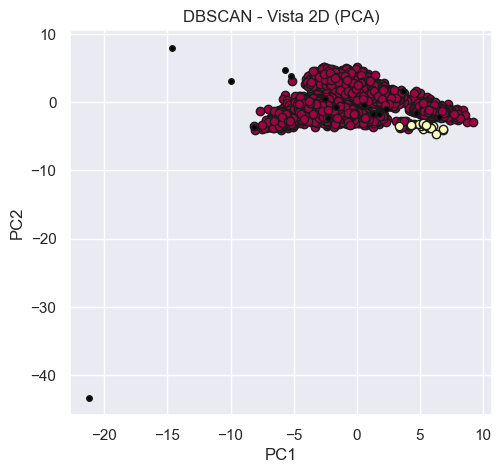

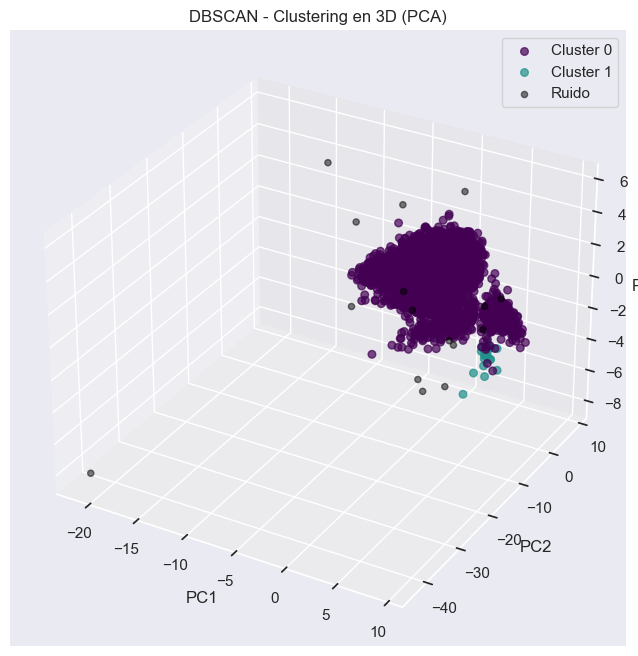

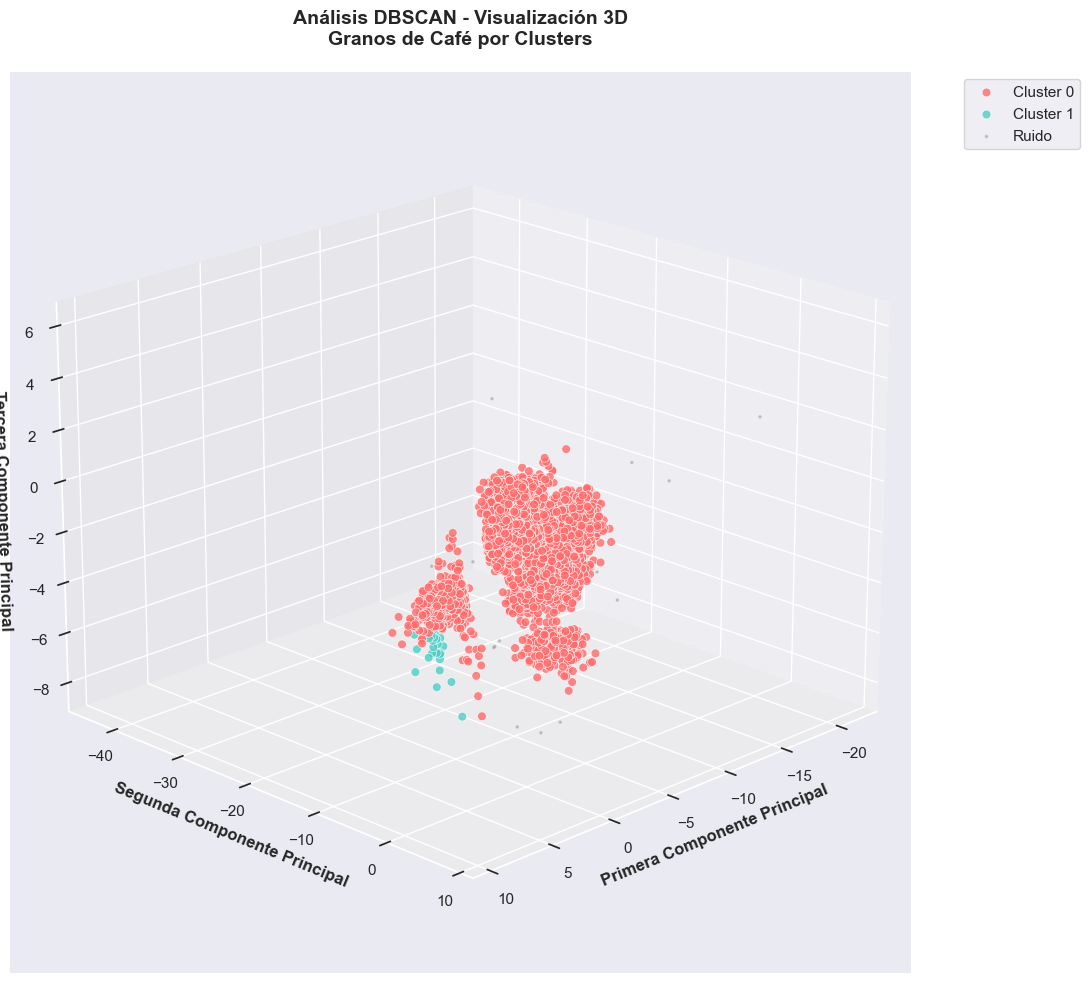

Cluster 0:
  - Número de puntos: 5494
  - Centroide: [ 0.00307802  0.02149051  0.00654263  0.00654263 -0.00602188]...
Cluster 1:
  - Número de puntos: 27
  - Centroide: [-0.40501041 -1.80701719 -0.13084617 -0.13084617  1.78818255]...

Shape de centroides: (2, 22)
Número de clusters: 2
Puntos de ruido: 16
puntaje silhouette: 0.6624407276550269


In [32]:
# Usar el mejor eps encontrado
best_eps =  5.8 # Ajustar según tus resultados
dbscan_final = DBSCAN(eps=best_eps, min_samples=10)
final_labels = dbscan_final.fit_predict(X_dbscan)

# Visualización 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_dbscan)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
unique_labels = set(final_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Negro para ruido
    
    class_member_mask = (final_labels == k)
    xy = X_pca_2d[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k != -1 else 4)

plt.title('DBSCAN - Vista 2D (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Reducir a 3 dimensiones con PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_dbscan)

# Crear figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores para cada cluster
unique_labels = set(final_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plotear cada cluster
for k, color in zip(unique_labels, colors):
    if k == -1:
        # Puntos de ruido en negro
        class_member_mask = (final_labels == k)
        xyz = X_pca_3d[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], 
                  c='black', marker='o', s=20, alpha=0.5, label='Ruido')
    else:
        # Puntos del cluster
        class_member_mask = (final_labels == k)
        xyz = X_pca_3d[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], 
                  c=[color], marker='o', s=30, alpha=0.7, label=f'Cluster {k}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN - Clustering en 3D (PCA)')
ax.legend()
plt.show()

n_clusters = len(set(final_labels)) - (1 if -1 in final_labels else 0)
n_noise = list(final_labels).count(-1)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Definir colores personalizados
cluster_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, (k, color) in enumerate(zip(unique_labels, colors)):
    if k == -1:
        class_member_mask = (final_labels == k)
        xyz = X_pca_3d[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], 
                  c='gray', marker='.', s=10, alpha=0.3, label='Ruido')
    else:
        class_member_mask = (final_labels == k)
        xyz = X_pca_3d[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], 
                  c=cluster_colors[k % len(cluster_colors)], 
                  marker='o', s=40, alpha=0.8, 
                  edgecolors='white', linewidth=0.5,
                  label=f'Cluster {k}')

# Configurar ejes
ax.set_xlabel('Primera Componente Principal', fontsize=12, fontweight='bold')
ax.set_ylabel('Segunda Componente Principal', fontsize=12, fontweight='bold')
ax.set_zlabel('Tercera Componente Principal', fontsize=12, fontweight='bold')
ax.set_title('Análisis DBSCAN - Visualización 3D\nGranos de Café por Clusters', 
            fontsize=14, fontweight='bold', pad=20)

# Mejorar el estilo
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotar para mejor vista
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()
# Calcular centroides de cada cluster (excluyendo ruido)
centroides_dbscan = []
cluster_ids = []

for cluster_id in set(final_labels):
    if cluster_id != -1:  # Excluir puntos de ruido (-1)
        # Obtener puntos del cluster
        cluster_mask = (final_labels == cluster_id)
        cluster_points = X_dbscan[cluster_mask]
        
        # Calcular centroide (promedio de puntos)
        centroide = np.mean(cluster_points, axis=0)
        centroides_dbscan.append(centroide)
        cluster_ids.append(cluster_id)
        
        print(f"Cluster {cluster_id}:")
        print(f"  - Número de puntos: {np.sum(cluster_mask)}")
        print(f"  - Centroide: {centroide[:5]}...")  # Mostrar solo primeras 5 dimensiones

centroides_dbscan = np.array(centroides_dbscan)





print(f"\nShape de centroides: {centroides_dbscan.shape}")
print(f"Número de clusters: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")

print("puntaje silhouette: "+str(silhouette_score(X_dbscan, final_labels) ))

Los puntos de ruidos son minimos y se generan solo dos closters. Aunque uno de ellos es muy pequeño y se estan dibidiendo mal por esto revisaermos con k igual a 50 y epsilon igual a 4.1

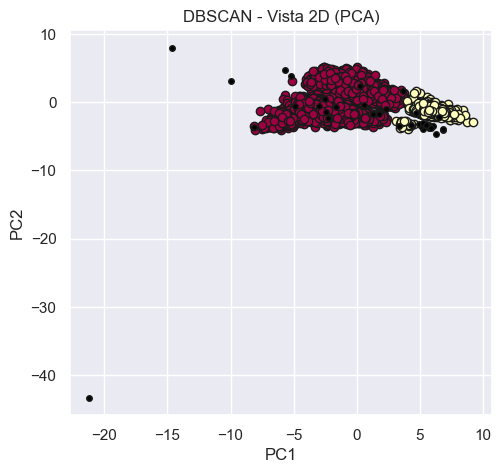

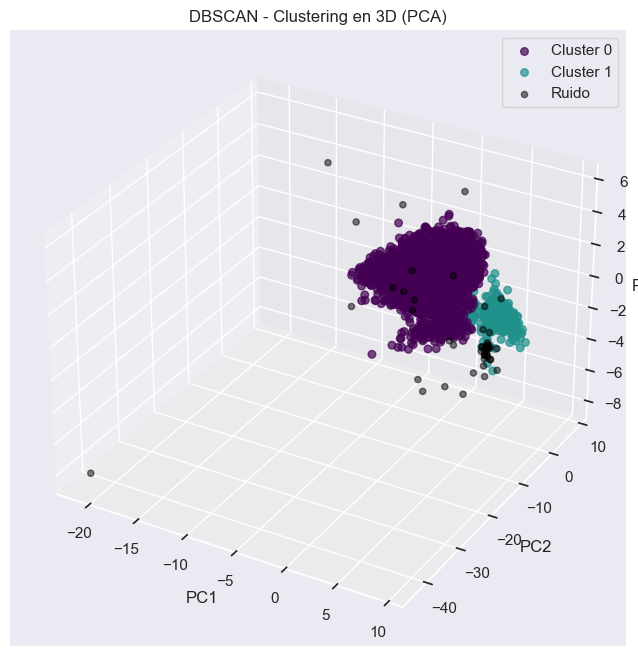

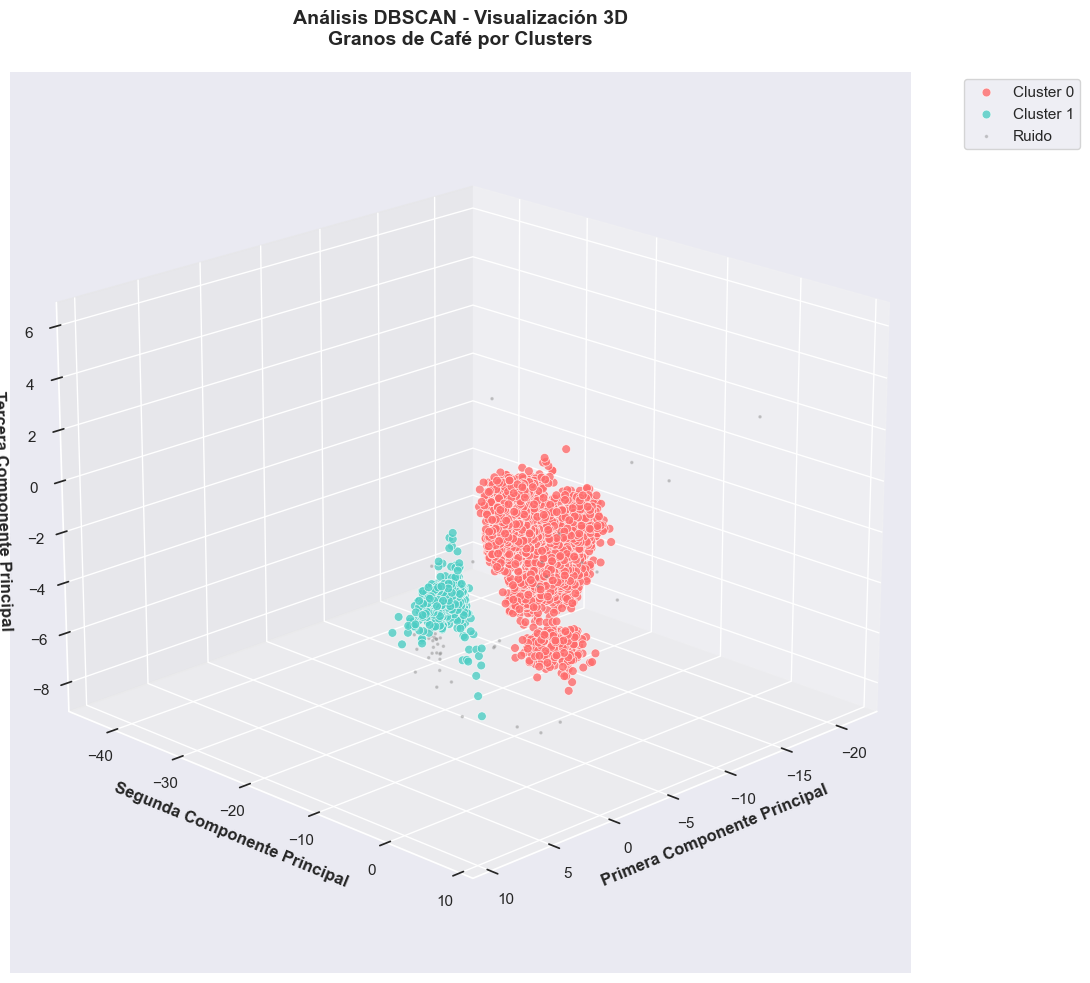

Cluster 0:
  - Número de puntos: 4812
  - Centroide: [ 0.0742799   0.27881541 -0.05997521 -0.05997521 -0.25705623]...
Cluster 1:
  - Número de puntos: 678
  - Centroide: [-0.49775757 -1.80482932  0.4801502   0.4801502   1.77573082]...

Shape de centroides: (2, 22)
Número de clusters: 2
Puntos de ruido: 47
puntaje silhouette: 0.42578156914962023


In [33]:
# Usar el mejor eps encontrado
best_eps =  4.1 # Ajustar según tus resultados
dbscan_final = DBSCAN(eps=best_eps, min_samples=50)
final_labels = dbscan_final.fit_predict(X_dbscan)

# Visualización 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_dbscan)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
unique_labels = set(final_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Negro para ruido
    
    class_member_mask = (final_labels == k)
    xy = X_pca_2d[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k != -1 else 4)

plt.title('DBSCAN - Vista 2D (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Reducir a 3 dimensiones con PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_dbscan)

# Crear figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores para cada cluster
unique_labels = set(final_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plotear cada cluster
for k, color in zip(unique_labels, colors):
    if k == -1:
        # Puntos de ruido en negro
        class_member_mask = (final_labels == k)
        xyz = X_pca_3d[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], 
                  c='black', marker='o', s=20, alpha=0.5, label='Ruido')
    else:
        # Puntos del cluster
        class_member_mask = (final_labels == k)
        xyz = X_pca_3d[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], 
                  c=[color], marker='o', s=30, alpha=0.7, label=f'Cluster {k}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN - Clustering en 3D (PCA)')
ax.legend()
plt.show()

n_clusters = len(set(final_labels)) - (1 if -1 in final_labels else 0)
n_noise = list(final_labels).count(-1)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Definir colores personalizados
cluster_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, (k, color) in enumerate(zip(unique_labels, colors)):
    if k == -1:
        class_member_mask = (final_labels == k)
        xyz = X_pca_3d[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], 
                  c='gray', marker='.', s=10, alpha=0.3, label='Ruido')
    else:
        class_member_mask = (final_labels == k)
        xyz = X_pca_3d[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], 
                  c=cluster_colors[k % len(cluster_colors)], 
                  marker='o', s=40, alpha=0.8, 
                  edgecolors='white', linewidth=0.5,
                  label=f'Cluster {k}')

# Configurar ejes
ax.set_xlabel('Primera Componente Principal', fontsize=12, fontweight='bold')
ax.set_ylabel('Segunda Componente Principal', fontsize=12, fontweight='bold')
ax.set_zlabel('Tercera Componente Principal', fontsize=12, fontweight='bold')
ax.set_title('Análisis DBSCAN - Visualización 3D\nGranos de Café por Clusters', 
            fontsize=14, fontweight='bold', pad=20)

# Mejorar el estilo
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotar para mejor vista
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()
# Calcular centroides de cada cluster (excluyendo ruido)
centroides_dbscan = []
cluster_ids = []

for cluster_id in set(final_labels):
    if cluster_id != -1:  # Excluir puntos de ruido (-1)
        # Obtener puntos del cluster
        cluster_mask = (final_labels == cluster_id)
        cluster_points = X_dbscan[cluster_mask]
        
        # Calcular centroide (promedio de puntos)
        centroide = np.mean(cluster_points, axis=0)
        centroides_dbscan.append(centroide)
        cluster_ids.append(cluster_id)
        
        print(f"Cluster {cluster_id}:")
        print(f"  - Número de puntos: {np.sum(cluster_mask)}")
        print(f"  - Centroide: {centroide[:5]}...")  # Mostrar solo primeras 5 dimensiones

centroides_dbscan = np.array(centroides_dbscan)





print(f"\nShape de centroides: {centroides_dbscan.shape}")
print(f"Número de clusters: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")

print("puntaje silhouette: "+str(silhouette_score(X_dbscan, final_labels) ))

Como nos podemos dar cuenta la divcion esta mejor echa sacando los dos grupos bien definidos y en este caso el puntaje silhouette bajo pero de todos modos es un puntaje aseptable, por la divicion de las clases y el puntaje decidimos dejar este algoritmo con estos hyperparametros.

Silhouette Score promedio: 0.426


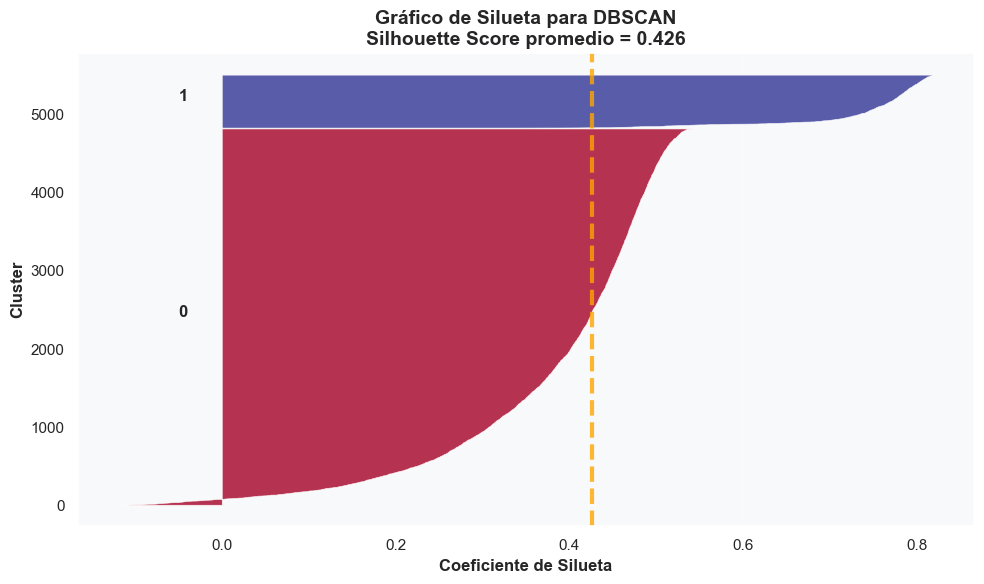

In [34]:
silhouette_avg = silhouette_score(X_dbscan, final_labels)
sample_silhouette_values = silhouette_samples(X_dbscan, final_labels)

print(f"Silhouette Score promedio: {silhouette_avg:.3f}")

# Crear el gráfico de silueta
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
# Cambiar colores a una paleta más vibrante
colors = plt.cm.RdYlBu (np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    # Obtener valores de silueta para este cluster
    ith_cluster_silhouette_values = sample_silhouette_values[final_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    # Colorear el área del cluster con gradiente viridis
    color = colors[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor='white', alpha=0.8, linewidth=0.5)
    
    # Etiquetar el cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), 
            fontsize=12, fontweight='bold')
    
    # Calcular siguiente posición
    y_lower = y_upper + 10

# Línea vertical para el score promedio en color naranja
ax.axvline(x=silhouette_avg, color="orange", linestyle="--", linewidth=3, alpha=0.8)

# Configurar el gráfico con mejor estilo
ax.set_xlabel('Coeficiente de Silueta', fontsize=12, fontweight='bold')
ax.set_ylabel('Cluster', fontsize=12, fontweight='bold')
ax.set_title(f'Gráfico de Silueta para DBSCAN\n'
                f'Silhouette Score promedio = {silhouette_avg:.3f}', 
                fontsize=14, fontweight='bold')

# Añadir grid para mejor lectura
ax.grid(True, alpha=0.3)

# Mejorar el fondo
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

Como nos podemos dar cuenta la separcion de los dos closters es adecuada con un buen Silhouette Score 

# Análisis de los resultados obtenidos y justificación del modelo recomendado para el caso propuesto
## Análisis de los resultados
Para analizar los resultados se tienen en cuenta principalmente dos aspectos. El primero es el Silhuete Score promedio, que nos ayuda a identificar qué tan bien agrupado está cada cluster. El segundo es el gráfico de la silueta, que nos permite visualizar la cantidad de items que pertenecen a cada uno de los grupos encontrados.

Así, para medir la calidad del modelo tenemos en cuenta también dos aspectos. El primero es la métrica que se obtiene en el Sillhuete Score promedio, prefiriendo los promedios mayores. El segundo aspecto es que tenga sentido en la lógica del negocio, pues buscamos grupos de café que tengan aspectos en común como heterogeneidad en tamaño, forma y estructura pues esto puede afectar tanto los procesos de tostión.
De esta manera, implementamos tres algoritmos de agrupación con el fin de encontrar los grupos que mejor representen los datos. Para todos los algoritmos se redujo la dimensionalidad de los datos  Los algoritmos implementados fueron tres: K-means, Agglomerative clustering y DBSCAN (cada uno explicado en su respectiva sección).

En cuanto a los resultados del K-Means, gracias al método del codo y la gráfica de la silueta se pudo identificar que el mejor Sillhuete Score promedio es de 0.383 y  se encuentrá con 7 clusters. Este es un número relativamente bajo, se puede explicar por la existencia de datos atipicos que se salen del rango circular que abarca cada grupo, disminuyendo la precisión promedio. Así, se puede decir que este resultado no tiene tanto sentido ya que requiere de muchos clusters para poder agrupar la información y esos clusters se sobrelapan entre sí, mostrando una baja calidad.

Con relación a Agglomerative Clustering, este algoritmo utiliza diferentes estrategias como el método de la silueta y la curva de Davies-Boulding para la elección del número óptimo de clusters, 2. Así, se llega a un  Sillhuete Score promedio de 0.435 que ordena de forma jerarquica dos grupos. Hay que destacar que este resultado tiene sentido en cuanto a que se encuentran los grupos con PCA bajo y alto, aunque puede verse también afectado por los datos atipicos al incuirlos en los grupos.

Por último, en DBSCAN este algoritmo tiene dos hiperparámetros principales, épsilon que es la radio máxima entre puntos para qué se consideran de la misma clúster y k que es el número mínimo de datos que necesita tener un clúster. A partir de estos hiperparámetros se generan los puntos centrales, los cuales tienen al menos k vecinos dentro de un radio épsilon y son el núcleo del cluster. Después están los puntos frontera están dentro del radio épsilon de un punto central, pero no tienen k vecinos en  ese radio. Finalmente, está el ruido, los cuales son putos atípicos  que no están cerca de los puntos centrales. Escogimos este algoritmo porque no se le tiene que predefinir la cantidad de clúster a diferencia de los otros dos y ese bueno manejando datos atípicos.

Así, se exponen algunas diferencias entre la calidad de la solución obtenida si se aplican diferentes algoritmos ya que cada uno tiene un enfoque diferente. Kmeans en principio es bueno encontrando datos bien separados, aunque como hay clusters irregulares y datos muy lejanos termina dando un desempeño bajo. Agglomerativa busca jerarquías, aunque puede llegar a tener problemas también con los datos atipicos y con datasets muy grandes. DBSCA es bueno con los outliers, aunque es muy sensible a los hiperparametros que se seleccionan.

Finalmente, se puede evidenciar que existen varios retos en estos modelos no supervisados, si se quisieran aplicar a nivel profesional. El primero es que muy importante hacer una buena limpieza de los datos ya que esto puede afectar en gran medida al modelo. Por ejemplo, de no estandarizar los datos, se puede sesgar por diferentes unidades. También si no se tratan bien los outliers se generan problemas luego en las métricas de agrupación. Por otro lado, la selección del modelo también es crucial ya que como funcionan de forma diferente puede ser más beneficioso utilizar unos sobre otros. Por ejemplo, en este caso con la existencia de datos atipicos puede que no sea lo ideal utilizar kmean, DBSCAN sí que los puede tratar con el riesgo de eliminar datos que sean importantes o de verse influenciado por los hiperparametros escogidos, Aglommerative también puede verse afectado por el dataset, aunque organiza de forma jerarquica los datos.

##  justificación del modelo recomendado para el caso 

En este caso hemos escogido el modelo dos Agglomerative clustering, porque es el modelo que mejor Sillhuete Score promedio tiene, siendo este de 0.435 y esta agrupando de una manera adecuada los clústeres. El algoritmo divide los datos en dos grupos y se está rigiendo por diferentes características como lo es la estructura general del grano donde afecta las variables FactorForma3 y la Excentricidad, pero también está teniendo en cuenta el contraste en donde las variables que más afectan son  Secado_Honey y Cluster esto en parte ayuda a manejar el ruido. Hablando más específicamente de los grupos, el 1 esta inluenciado principal mente por Secado_Lavado y DiametroEquivalente a diferencia del clostér 0 esta conformado por valores más variado y está influenciado por FactorForma1, Compacidad, y Redondez. 
